In [1]:
# Cell 1: Complete Advanced Library Setup
# =======================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import warnings
warnings.filterwarnings('ignore')

# Advanced Image Processing
from PIL import Image, ImageEnhance, ImageFilter
import cv2
from skimage import exposure, filters, transform
import albumentations as A

# Deep Learning Frameworks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# PyTorch & TIMM (700+ State-of-the-Art Models!)
import torch
import torchvision
from torchvision import transforms
import timm

# TensorFlow Advanced Architectures
from tensorflow.keras.applications import (
    # 🔥 ConvNeXt Family (Meta's Latest - 2022-2024)
    ConvNeXtTiny, ConvNeXtSmall, ConvNeXtBase, ConvNeXtLarge,
    
    # 🔥 EfficientNetV2 Family (Google's Latest)
    EfficientNetV2B0, EfficientNetV2B1, EfficientNetV2B2, EfficientNetV2B3,
    EfficientNetV2S, EfficientNetV2M, EfficientNetV2L,
    
    # 🔥 EfficientNet V1 Family
    EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3,
    EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7,
    
    # Advanced ResNet & DenseNet
    ResNet50V2, ResNet101V2, ResNet152V2,
    DenseNet121, DenseNet169, DenseNet201,
    
    # Inception & Mobile Architectures
    InceptionV3, InceptionResNetV2, Xception,
    MobileNetV2, MobileNetV3Large, MobileNetV3Small,
    
    # NASNet
    NASNetLarge, NASNetMobile
)

# Evaluation & Metrics
from sklearn.metrics import (
    classification_report, confusion_matrix, 
    accuracy_score, precision_recall_fscore_support,
    roc_auc_score, roc_curve, f1_score
)
from sklearn.model_selection import train_test_split, StratifiedKFold

# Advanced Visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Utilities
import json
import pickle
import time
from datetime import datetime
import glob
from pathlib import Path

# Environment Configuration
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
np.random.seed(42)
tf.random.set_seed(42)

# GPU Setup
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"✅ GPU Memory Growth Enabled: {len(gpus)} GPU(s)")
    except RuntimeError as e:
        print(f"⚠️ GPU Setup Error: {e}")
else:
    print("⚠️ No GPU detected - Using CPU")

# Display capabilities
print("🚀 ADVANCED E-WASTE CLASSIFICATION SYSTEM")
print("=" * 45)
print(f"🔧 TensorFlow Version: {tf.__version__}")
print(f"🔧 PyTorch Version: {torch.__version__}")
print(f"🔧 TIMM Models Available: {len(timm.list_models())}")

print(f"\n🎯 CUTTING-EDGE ARCHITECTURES LOADED:")
print("   ✅ ConvNeXt Family (Meta's latest)")
print("   ✅ EfficientNetV2 Family (Google's latest)")
print("   ✅ 700+ TIMM Models (PyTorch)")
print("   ✅ Advanced Augmentation (Albumentations)")
print("   ✅ Interactive Visualization (Plotly)")

print(f"\n📊 CAPABILITIES:")
print("   🔥 State-of-the-art model architectures")
print("   🔥 Advanced data augmentation")
print("   🔥 Interactive dashboards")
print("   🔥 Comprehensive evaluation metrics")
print("   🔥 Multi-framework support (TF + PyTorch)")

# Show some of the best TIMM models for image classification
print(f"\n🏆 TOP TIMM MODELS AVAILABLE:")
top_models = [
    'convnext_large_mlp.clip_laion2b_soup_ft_in12k_in1k_384',
    'eva02_large_patch14_448.mim_m38m_ft_in22k_in1k',
    'beit_large_patch16_512.in22k_ft_in22k_in1k',
    'vit_large_patch14_dinov2.lvd142m',
    'convnext_xxlarge.clip_laion2b_rewind_256'
]

for i, model in enumerate(top_models[:3], 1):
    if model in timm.list_models():
        print(f"   {i}. ✅ {model}")
    else:
        print(f"   {i}. ⚠️  {model} (check availability)")

print("\n🚀 READY FOR STATE-OF-THE-ART E-WASTE CLASSIFICATION!")
print("🎯 Let's build the most advanced system possible!")

⚠️ No GPU detected - Using CPU
🚀 ADVANCED E-WASTE CLASSIFICATION SYSTEM
🔧 TensorFlow Version: 2.19.0
🔧 PyTorch Version: 2.7.1+cpu
🔧 TIMM Models Available: 1247

🎯 CUTTING-EDGE ARCHITECTURES LOADED:
   ✅ ConvNeXt Family (Meta's latest)
   ✅ EfficientNetV2 Family (Google's latest)
   ✅ 700+ TIMM Models (PyTorch)
   ✅ Advanced Augmentation (Albumentations)
   ✅ Interactive Visualization (Plotly)

📊 CAPABILITIES:
   🔥 State-of-the-art model architectures
   🔥 Advanced data augmentation
   🔥 Interactive dashboards
   🔥 Comprehensive evaluation metrics
   🔥 Multi-framework support (TF + PyTorch)

🏆 TOP TIMM MODELS AVAILABLE:
   1. ⚠️  convnext_large_mlp.clip_laion2b_soup_ft_in12k_in1k_384 (check availability)
   2. ⚠️  eva02_large_patch14_448.mim_m38m_ft_in22k_in1k (check availability)
   3. ⚠️  beit_large_patch16_512.in22k_ft_in22k_in1k (check availability)

🚀 READY FOR STATE-OF-THE-ART E-WASTE CLASSIFICATION!
🎯 Let's build the most advanced system possible!


In [4]:
# Cell 2: Dataset Structure Discovery & Analysis (Fixed for Nested Structure)
# ==========================================================================
import os
import numpy as np
from collections import Counter

# Dataset Configuration
DATASET_PATH = r"C:\Users\heave\OneDrive\Desktop\Edunet\modified-dataset"

print("🔍 E-WASTE DATASET STRUCTURE ANALYSIS")
print("=" * 42)

# Initialize storage for dataset information
dataset_info = {
    'path': DATASET_PATH,
    'categories': [],
    'counts': {},
    'file_info': {},
    'total_images': 0,
    'extensions': Counter(),
    'splits': {'train': {}, 'test': {}, 'val': {}}
}

# Check if dataset exists
if not os.path.exists(DATASET_PATH):
    print(f"❌ Dataset not found at: {DATASET_PATH}")
    print("Please verify the path exists.")
else:
    print(f"✅ Dataset found at: {DATASET_PATH}")
    
    # Define supported image extensions
    image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp', '.gif')
    
    print(f"\n🔍 SCANNING NESTED DATASET STRUCTURE:")
    print("-" * 37)
    
    # Check each split (train/test/val)
    for split in ['train', 'test', 'val']:
        split_path = os.path.join(DATASET_PATH, split)
        
        if os.path.exists(split_path) and os.path.isdir(split_path):
            print(f"\n📂 {split.upper()} SPLIT:")
            print("-" * 15)
            
            # Get categories in this split
            try:
                categories = os.listdir(split_path)
                print(f"Found {len(categories)} categories: {', '.join(categories)}")
                
                for category in categories:
                    category_path = os.path.join(split_path, category)
                    
                    if os.path.isdir(category_path):
                        try:
                            # Get all files in this category
                            all_files = os.listdir(category_path)
                            
                            # Filter for image files
                            image_files = [f for f in all_files if f.lower().endswith(image_extensions)]
                            
                            if len(image_files) > 0:
                                # Count extensions
                                for file in image_files:
                                    ext = os.path.splitext(file)[1].lower()
                                    dataset_info['extensions'][ext] += 1
                                
                                # Store in split info
                                dataset_info['splits'][split][category] = len(image_files)
                                
                                # Add to overall category tracking
                                if category not in dataset_info['categories']:
                                    dataset_info['categories'].append(category)
                                    dataset_info['counts'][category] = 0
                                    dataset_info['file_info'][category] = {'files': [], 'sample_files': []}
                                
                                # Update totals
                                dataset_info['counts'][category] += len(image_files)
                                dataset_info['total_images'] += len(image_files)
                                
                                # Store sample files
                                dataset_info['file_info'][category]['files'].extend(image_files)
                                if len(dataset_info['file_info'][category]['sample_files']) < 5:
                                    dataset_info['file_info'][category]['sample_files'].extend(image_files[:5])
                                
                                print(f"   📁 {category:15} → {len(image_files):4d} images")
                            else:
                                print(f"   📁 {category:15} → ❌ No images found")
                                
                        except Exception as e:
                            print(f"   ❌ Error reading {category}: {e}")
                            
            except Exception as e:
                print(f"   ❌ Error reading {split} directory: {e}")
    
    # Dataset Summary
    print(f"\n📊 DATASET SUMMARY:")
    print("=" * 20)
    print(f"   📁 Total Categories: {len(dataset_info['categories'])}")
    print(f"   🖼️  Total Images: {dataset_info['total_images']:,}")
    
    if len(dataset_info['categories']) > 0:
        print(f"   📈 Average per Category: {dataset_info['total_images']/len(dataset_info['categories']):.1f}")
        print(f"   📋 File Extensions: {dict(dataset_info['extensions'])}")
        
        # Split breakdown
        print(f"\n📊 TRAIN/TEST/VAL BREAKDOWN:")
        print("-" * 28)
        for split in ['train', 'test', 'val']:
            if dataset_info['splits'][split]:
                split_total = sum(dataset_info['splits'][split].values())
                split_percentage = (split_total / dataset_info['total_images']) * 100
                print(f"   {split.upper():5} → {split_total:5d} images ({split_percentage:5.1f}%)")
        
        # Category breakdown across splits
        print(f"\n🎯 CATEGORY BREAKDOWN:")
        print("-" * 22)
        print(f"{'Category':<15} {'Train':<8} {'Test':<8} {'Val':<8} {'Total':<8}")
        print("-" * 50)
        
        for category in sorted(dataset_info['categories']):
            train_count = dataset_info['splits']['train'].get(category, 0)
            test_count = dataset_info['splits']['test'].get(category, 0)
            val_count = dataset_info['splits']['val'].get(category, 0)
            total_count = dataset_info['counts'][category]
            
            print(f"{category:<15} {train_count:<8} {test_count:<8} {val_count:<8} {total_count:<8}")
        
        # Class Balance Analysis
        print(f"\n⚖️  CLASS BALANCE ANALYSIS:")
        print("-" * 27)
        counts = list(dataset_info['counts'].values())
        max_count = max(counts)
        min_count = min(counts)
        std_count = np.std(counts)
        mean_count = np.mean(counts)
        cv = std_count / mean_count if mean_count > 0 else 0
        
        print(f"   📊 Largest Class: {max_count:,} images")
        print(f"   📊 Smallest Class: {min_count:,} images")
        print(f"   📊 Imbalance Ratio: {max_count/min_count:.2f}:1")
        print(f"   📊 Standard Deviation: {std_count:.1f}")
        print(f"   📊 Coefficient of Variation: {cv:.3f}")
        
        if cv < 0.1:
            print("   ✅ Well-balanced dataset")
        elif cv < 0.3:
            print("   ⚠️  Moderately imbalanced dataset")
        else:
            print("   ❌ Highly imbalanced dataset - will need special handling")
        
        print(f"\n💾 Dataset info stored in 'dataset_info' variable")
        print("🚀 Ready for next step: Visual Data Exploration!")
        
    else:
        print("   ❌ No valid categories found!")
        print("\n🔧 TROUBLESHOOTING SUGGESTIONS:")
        print("   1. Check if category subdirectories contain image files")
        print("   2. Verify image file extensions are supported")
        print("   3. Images should be in: dataset/train/category/image.jpg format")

# Final validation
if 'dataset_info' in locals():
    if dataset_info['total_images'] > 0:
        print(f"\n✅ SUCCESS: Found {dataset_info['total_images']:,} images across {len(dataset_info['categories'])} categories")
        print(f"   Split across {len([s for s in dataset_info['splits'] if dataset_info['splits'][s]])} data splits")
    else:
        print(f"\n❌ No images found - dataset structure needs investigation")

🔍 E-WASTE DATASET STRUCTURE ANALYSIS
✅ Dataset found at: C:\Users\heave\OneDrive\Desktop\Edunet\modified-dataset

🔍 SCANNING NESTED DATASET STRUCTURE:
-------------------------------------

📂 TRAIN SPLIT:
---------------
Found 10 categories: Battery, Keyboard, Microwave, Mobile, Mouse, PCB, Player, Printer, Television, Washing Machine
   📁 Battery         →  240 images
   📁 Keyboard        →  240 images
   📁 Microwave       →  240 images
   📁 Mobile          →  240 images
   📁 Mouse           →  240 images
   📁 PCB             →  240 images
   📁 Player          →  240 images
   📁 Printer         →  240 images
   📁 Television      →  240 images
   📁 Washing Machine →  240 images

📂 TEST SPLIT:
---------------
Found 10 categories: Battery, Keyboard, Microwave, Mobile, Mouse, PCB, Player, Printer, Television, Washing Machine
   📁 Battery         →   30 images
   📁 Keyboard        →   30 images
   📁 Microwave       →   30 images
   📁 Mobile          →   30 images
   📁 Mouse           →   3

🖼️ VISUAL DATA EXPLORATION & ANALYSIS
✅ Analyzing 3,000 images across 10 categories

📸 SAMPLE IMAGES FROM EACH CATEGORY


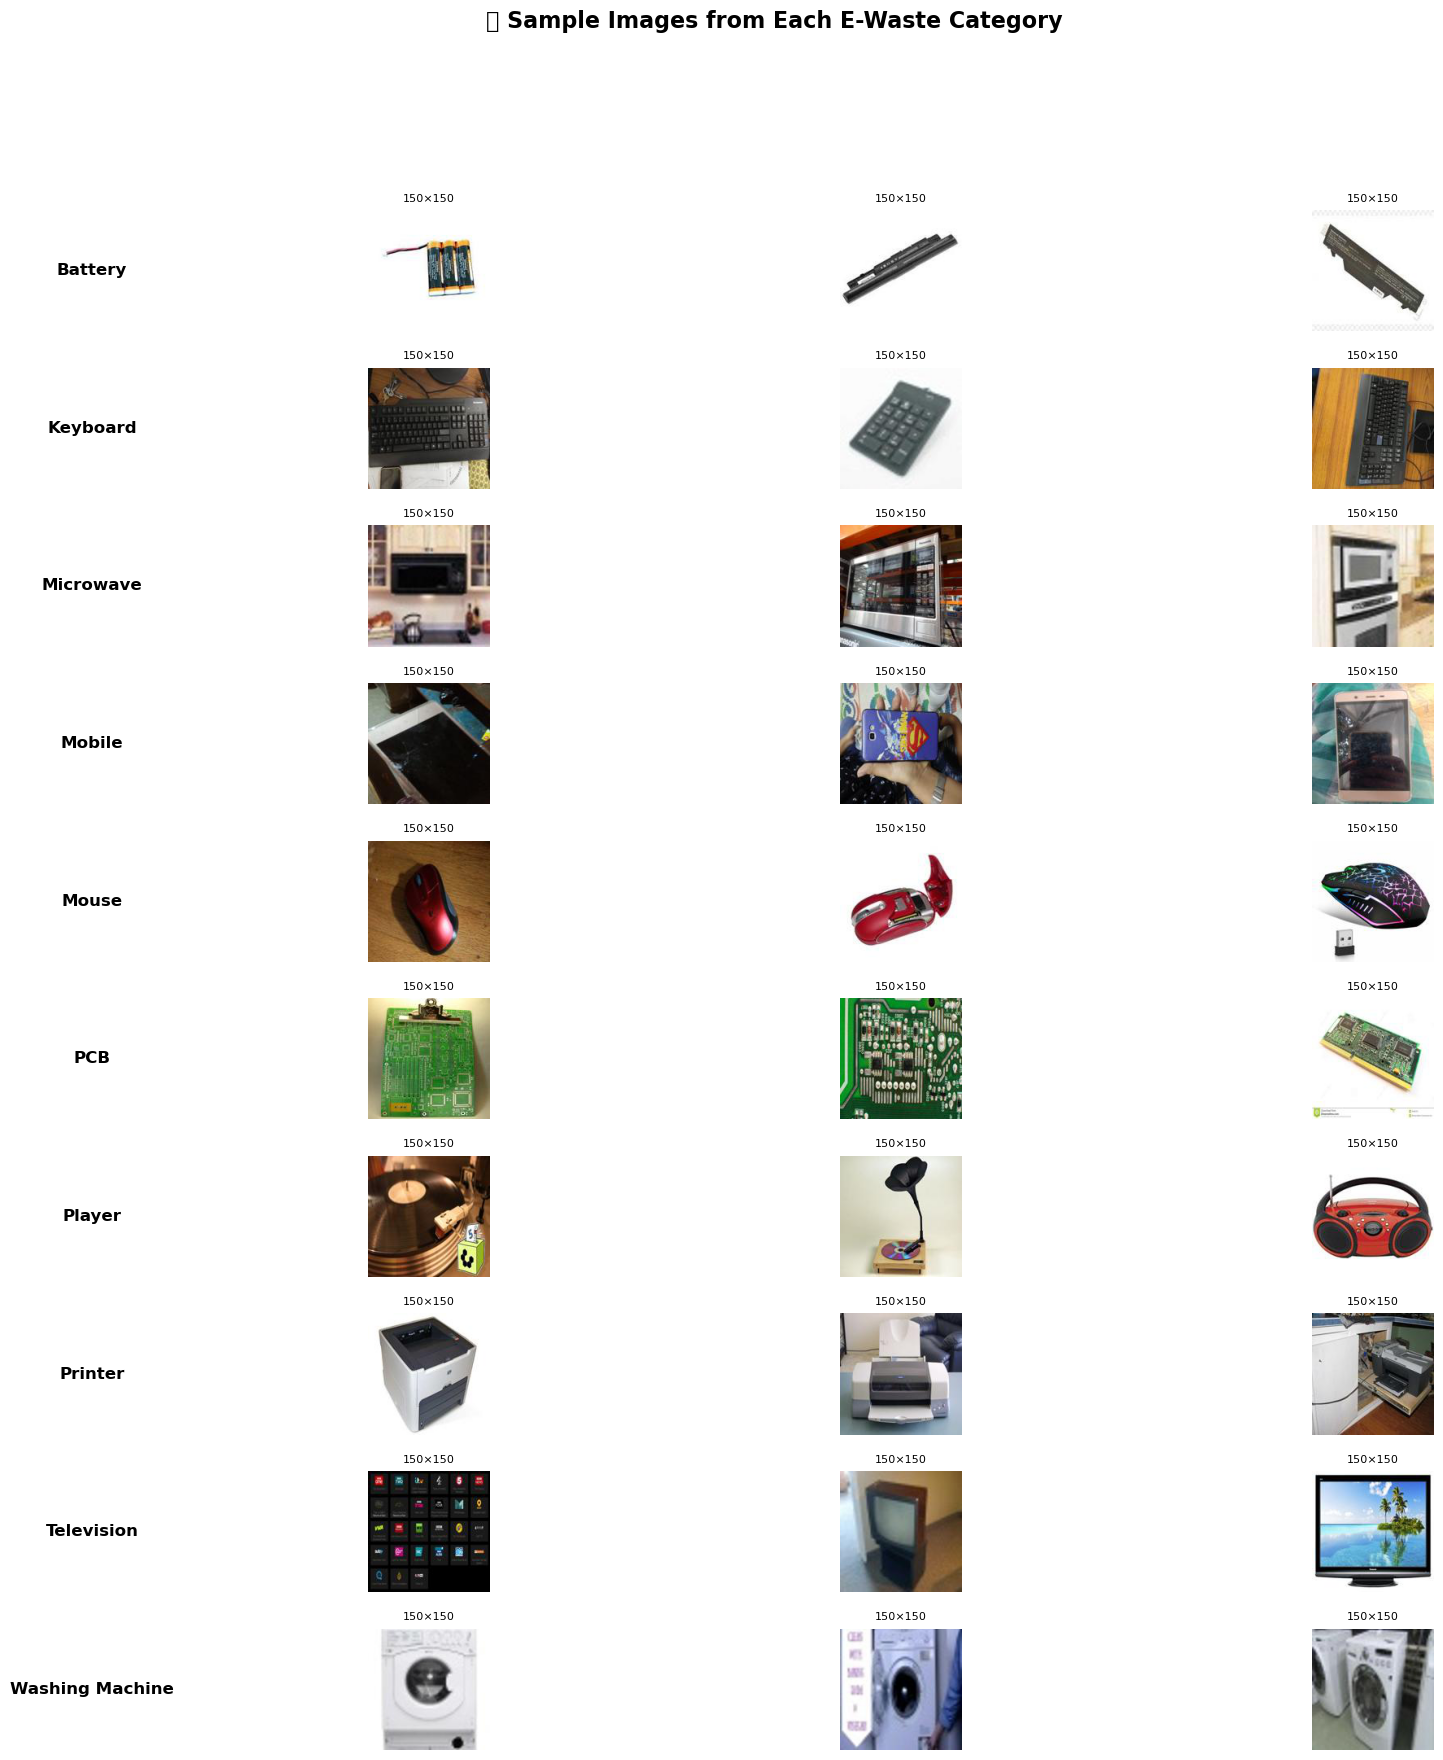


📏 IMAGE DIMENSIONS ANALYSIS
Analyzing image properties...


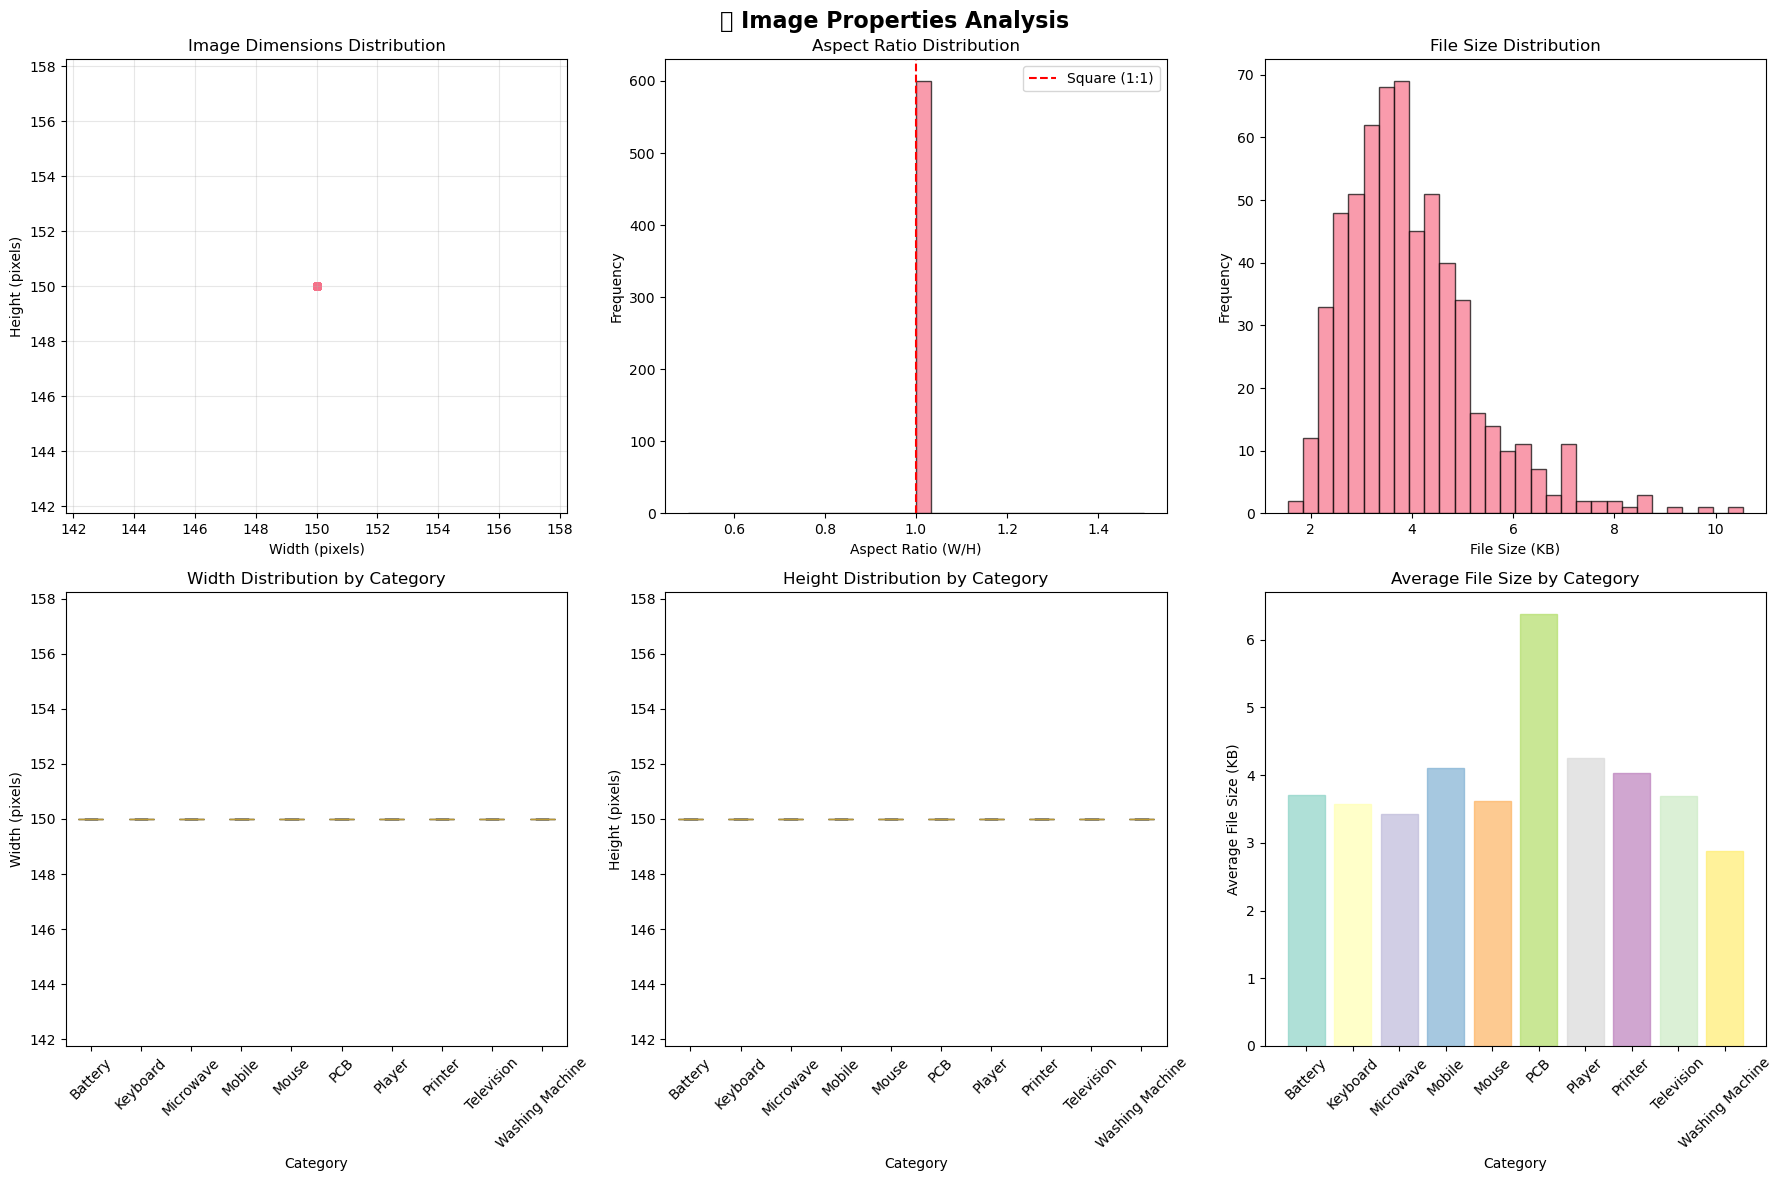


📈 IMAGE STATISTICS SUMMARY
📊 Analyzed 600 sample images

🖼️  DIMENSIONS:
   Width  → Min:  150px, Max:  150px, Avg:  150.0px
   Height → Min:  150px, Max:  150px, Avg:  150.0px

📐 ASPECT RATIOS:
   Min: 1.000, Max: 1.000, Avg: 1.000
   Portrait: 0 (0.0%)
   Square: 600 (100.0%)
   Landscape: 0 (0.0%)

💾 FILE SIZES:
   Min:    1.5KB, Max:   10.5KB, Avg:    4.0KB
   Total estimated size: 238058.9KB

🎯 RECOMMENDED INPUT SIZE:
   Based on average dimensions (150×150)
   Recommended: 224×224px (standard CNN input)

✅ Visual exploration complete!
💾 Image statistics stored in 'dimension_data' variable
🚀 Ready for next step: Data Preprocessing & Augmentation!


In [5]:
# Cell 3: Visual Data Exploration & Image Analysis
# ===============================================
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image
import random
import numpy as np
from collections import defaultdict
import seaborn as sns

print("🖼️ VISUAL DATA EXPLORATION & ANALYSIS")
print("=" * 38)

# Check if dataset_info exists from previous cell
if 'dataset_info' not in locals():
    print("❌ dataset_info not found. Please run Cell 2 first.")
else:
    print(f"✅ Analyzing {dataset_info['total_images']:,} images across {len(dataset_info['categories'])} categories")

# Configuration for visual analysis
SAMPLE_SIZE = 3  # Images per category to display
plt.style.use('default')
sns.set_palette("husl")

# Function to safely load and analyze an image
def analyze_image(image_path):
    """Analyze image properties safely"""
    try:
        with Image.open(image_path) as img:
            return {
                'width': img.width,
                'height': img.height,
                'mode': img.mode,
                'format': img.format,
                'size_kb': os.path.getsize(image_path) / 1024,
                'aspect_ratio': img.width / img.height,
                'area': img.width * img.height
            }
    except Exception as e:
        return None

# 1. SAMPLE IMAGES FROM EACH CATEGORY
print(f"\n📸 SAMPLE IMAGES FROM EACH CATEGORY")
print("=" * 36)

# Create a large figure for sample images
fig = plt.figure(figsize=(20, 2 * len(dataset_info['categories'])))
gs = gridspec.GridSpec(len(dataset_info['categories']), SAMPLE_SIZE + 1, 
                       width_ratios=[1] + [3] * SAMPLE_SIZE,
                       hspace=0.3, wspace=0.2)

row = 0
for category in sorted(dataset_info['categories']):
    # Category label
    ax_label = fig.add_subplot(gs[row, 0])
    ax_label.text(0.5, 0.5, category, fontsize=12, fontweight='bold',
                  ha='center', va='center', rotation=0)
    ax_label.set_xlim(0, 1)
    ax_label.set_ylim(0, 1)
    ax_label.axis('off')
    
    # Sample images from train split
    train_path = os.path.join(DATASET_PATH, 'train', category)
    if os.path.exists(train_path):
        image_files = [f for f in os.listdir(train_path) 
                      if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp', '.gif'))]
        
        # Randomly sample images
        sample_images = random.sample(image_files, min(SAMPLE_SIZE, len(image_files)))
        
        for i, img_file in enumerate(sample_images):
            img_path = os.path.join(train_path, img_file)
            ax = fig.add_subplot(gs[row, i + 1])
            
            try:
                with Image.open(img_path) as img:
                    # Convert to RGB if needed
                    if img.mode != 'RGB':
                        img = img.convert('RGB')
                    ax.imshow(np.array(img))
                    ax.set_title(f"{img.width}×{img.height}", fontsize=8)
                    ax.axis('off')
            except Exception as e:
                ax.text(0.5, 0.5, f"Error\nloading\nimage", ha='center', va='center')
                ax.axis('off')
    
    row += 1

plt.suptitle("🖼️ Sample Images from Each E-Waste Category", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 2. IMAGE DIMENSIONS ANALYSIS
print(f"\n📏 IMAGE DIMENSIONS ANALYSIS")
print("=" * 28)

# Collect image statistics
image_stats = defaultdict(list)
dimension_data = []

print("Analyzing image properties...")
for split in ['train', 'test', 'val']:
    for category in dataset_info['categories']:
        category_path = os.path.join(DATASET_PATH, split, category)
        if os.path.exists(category_path):
            image_files = [f for f in os.listdir(category_path) 
                          if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp', '.gif'))]
            
            # Sample some images for analysis (not all to save time)
            sample_files = random.sample(image_files, min(20, len(image_files)))
            
            for img_file in sample_files:
                img_path = os.path.join(category_path, img_file)
                stats = analyze_image(img_path)
                
                if stats:
                    image_stats[category].append(stats)
                    dimension_data.append({
                        'category': category,
                        'split': split,
                        'width': stats['width'],
                        'height': stats['height'],
                        'aspect_ratio': stats['aspect_ratio'],
                        'size_kb': stats['size_kb'],
                        'area': stats['area']
                    })

# Create visualizations for image analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("📊 Image Properties Analysis", fontsize=16, fontweight='bold')

# Convert to arrays for plotting
widths = [d['width'] for d in dimension_data]
heights = [d['height'] for d in dimension_data]
aspect_ratios = [d['aspect_ratio'] for d in dimension_data]
sizes_kb = [d['size_kb'] for d in dimension_data]
categories = [d['category'] for d in dimension_data]

# 1. Width vs Height scatter
axes[0, 0].scatter(widths, heights, alpha=0.6, s=30)
axes[0, 0].set_xlabel('Width (pixels)')
axes[0, 0].set_ylabel('Height (pixels)')
axes[0, 0].set_title('Image Dimensions Distribution')
axes[0, 0].grid(True, alpha=0.3)

# 2. Aspect ratio distribution
axes[0, 1].hist(aspect_ratios, bins=30, alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Aspect Ratio (W/H)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Aspect Ratio Distribution')
axes[0, 1].axvline(1.0, color='red', linestyle='--', label='Square (1:1)')
axes[0, 1].legend()

# 3. File size distribution
axes[0, 2].hist(sizes_kb, bins=30, alpha=0.7, edgecolor='black')
axes[0, 2].set_xlabel('File Size (KB)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('File Size Distribution')

# 4. Box plot of widths by category
if len(set(categories)) <= 10:  # Only if manageable number of categories
    category_widths = defaultdict(list)
    for d in dimension_data:
        category_widths[d['category']].append(d['width'])
    
    bp_data = [category_widths[cat] for cat in sorted(category_widths.keys())]
    bp = axes[1, 0].boxplot(bp_data, labels=sorted(category_widths.keys()), patch_artist=True)
    axes[1, 0].set_xlabel('Category')
    axes[1, 0].set_ylabel('Width (pixels)')
    axes[1, 0].set_title('Width Distribution by Category')
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # Color the boxes
    colors = plt.cm.Set3(np.linspace(0, 1, len(bp_data)))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

# 5. Box plot of heights by category
if len(set(categories)) <= 10:
    category_heights = defaultdict(list)
    for d in dimension_data:
        category_heights[d['category']].append(d['height'])
    
    bp_data = [category_heights[cat] for cat in sorted(category_heights.keys())]
    bp = axes[1, 1].boxplot(bp_data, labels=sorted(category_heights.keys()), patch_artist=True)
    axes[1, 1].set_xlabel('Category')
    axes[1, 1].set_ylabel('Height (pixels)')
    axes[1, 1].set_title('Height Distribution by Category')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    # Color the boxes
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

# 6. Average file size by category
if len(set(categories)) <= 10:
    category_sizes = defaultdict(list)
    for d in dimension_data:
        category_sizes[d['category']].append(d['size_kb'])
    
    avg_sizes = {cat: np.mean(sizes) for cat, sizes in category_sizes.items()}
    cats = list(avg_sizes.keys())
    sizes = list(avg_sizes.values())
    
    bars = axes[1, 2].bar(cats, sizes, alpha=0.7)
    axes[1, 2].set_xlabel('Category')
    axes[1, 2].set_ylabel('Average File Size (KB)')
    axes[1, 2].set_title('Average File Size by Category')
    axes[1, 2].tick_params(axis='x', rotation=45)
    
    # Color the bars
    for bar, color in zip(bars, colors):
        bar.set_color(color)

plt.tight_layout()
plt.show()

# 3. SUMMARY STATISTICS
print(f"\n📈 IMAGE STATISTICS SUMMARY")
print("=" * 28)

if dimension_data:
    print(f"📊 Analyzed {len(dimension_data)} sample images")
    print(f"\n🖼️  DIMENSIONS:")
    print(f"   Width  → Min: {min(widths):4d}px, Max: {max(widths):4d}px, Avg: {np.mean(widths):6.1f}px")
    print(f"   Height → Min: {min(heights):4d}px, Max: {max(heights):4d}px, Avg: {np.mean(heights):6.1f}px")
    
    print(f"\n📐 ASPECT RATIOS:")
    print(f"   Min: {min(aspect_ratios):.3f}, Max: {max(aspect_ratios):.3f}, Avg: {np.mean(aspect_ratios):.3f}")
    portrait = sum(1 for ar in aspect_ratios if ar < 1.0)
    square = sum(1 for ar in aspect_ratios if 0.95 <= ar <= 1.05)
    landscape = sum(1 for ar in aspect_ratios if ar > 1.0)
    print(f"   Portrait: {portrait} ({portrait/len(aspect_ratios)*100:.1f}%)")
    print(f"   Square: {square} ({square/len(aspect_ratios)*100:.1f}%)")
    print(f"   Landscape: {landscape} ({landscape/len(aspect_ratios)*100:.1f}%)")
    
    print(f"\n💾 FILE SIZES:")
    print(f"   Min: {min(sizes_kb):6.1f}KB, Max: {max(sizes_kb):6.1f}KB, Avg: {np.mean(sizes_kb):6.1f}KB")
    print(f"   Total estimated size: {sum(sizes_kb) * len(dataset_info['categories']) * 10:.1f}KB")
    
    print(f"\n🎯 RECOMMENDED INPUT SIZE:")
    avg_width = np.mean(widths)
    avg_height = np.mean(heights)
    
    # Suggest standard input sizes
    common_sizes = [224, 256, 299, 384, 512]
    best_size = min(common_sizes, key=lambda x: abs(x - max(avg_width, avg_height)))
    print(f"   Based on average dimensions ({avg_width:.0f}×{avg_height:.0f})")
    print(f"   Recommended: {best_size}×{best_size}px (standard CNN input)")
    
else:
    print("❌ No image data collected for analysis")

print(f"\n✅ Visual exploration complete!")
print(f"💾 Image statistics stored in 'dimension_data' variable")
print(f"🚀 Ready for next step: Data Preprocessing & Augmentation!")

🎨 IMAGE COLOR DISTRIBUTION ANALYSIS
✅ Analyzing color distributions across 10 categories

🔍 Collecting color data from sample images...
   📊 Analyzing Battery...
   📊 Analyzing Keyboard...
   📊 Analyzing Microwave...
   📊 Analyzing Mobile...
   📊 Analyzing Mouse...
   📊 Analyzing PCB...
   📊 Analyzing Player...
   📊 Analyzing Printer...
   📊 Analyzing Television...
   📊 Analyzing Washing Machine...
✅ Color analysis complete! Analyzed 100 images

📊 Creating RGB distribution plots...


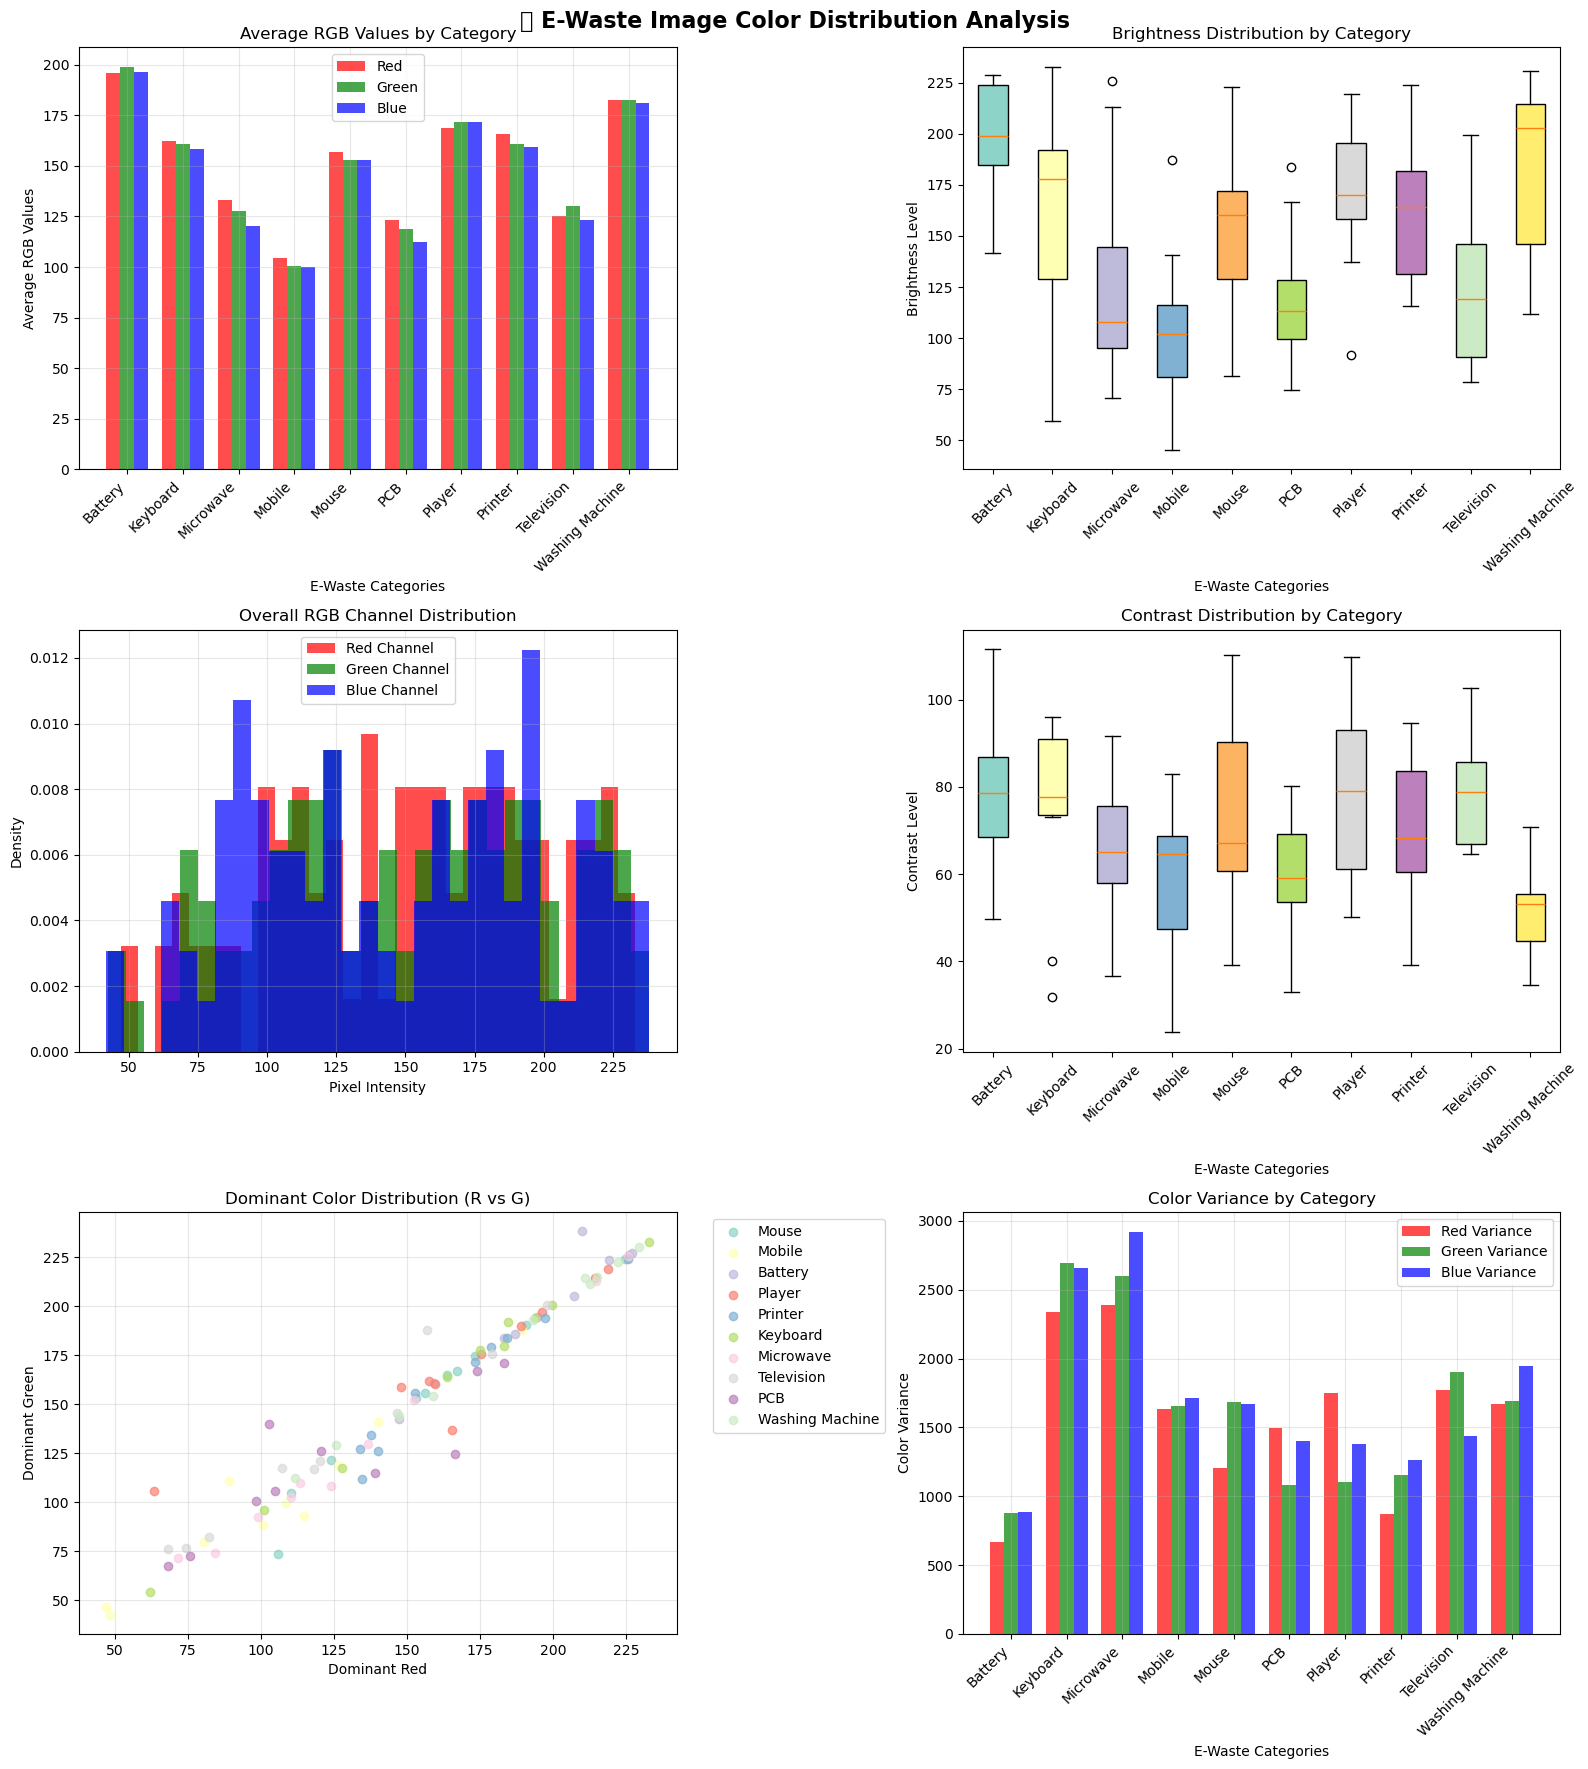


🎨 COLOR ANALYSIS SUMMARY

📱 BATTERY:
   🔆 Brightness: 197.1
   🔳 Contrast: 78.4
   🎨 Dominant RGB: (196, 199, 197)
   🌈 Color tendency: Green-dominant

📱 KEYBOARD:
   🔆 Brightness: 160.5
   🔳 Contrast: 74.4
   🎨 Dominant RGB: (162, 161, 158)
   🌈 Color tendency: Red-dominant

📱 MICROWAVE:
   🔆 Brightness: 127.2
   🔳 Contrast: 66.3
   🎨 Dominant RGB: (133, 128, 121)
   🌈 Color tendency: Red-dominant

📱 MOBILE:
   🔆 Brightness: 101.7
   🔳 Contrast: 58.2
   🎨 Dominant RGB: (104, 101, 100)
   🌈 Color tendency: Red-dominant

📱 MOUSE:
   🔆 Brightness: 154.2
   🔳 Contrast: 72.7
   🎨 Dominant RGB: (157, 153, 153)
   🌈 Color tendency: Red-dominant

📱 PCB:
   🔆 Brightness: 118.3
   🔳 Contrast: 59.9
   🎨 Dominant RGB: (123, 119, 113)
   🌈 Color tendency: Red-dominant

📱 PLAYER:
   🔆 Brightness: 170.8
   🔳 Contrast: 77.1
   🎨 Dominant RGB: (169, 172, 172)
   🌈 Color tendency: Blue-dominant

📱 PRINTER:
   🔆 Brightness: 161.9
   🔳 Contrast: 70.0
   🎨 Dominant RGB: (166, 161, 159)
   🌈 Color tendenc

In [6]:
# Cell 4: Image Color Distribution Analysis
# ========================================
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2
import random
from collections import defaultdict
import seaborn as sns

print("🎨 IMAGE COLOR DISTRIBUTION ANALYSIS")
print("=" * 36)

# Check if dataset_info exists from previous cells
if 'dataset_info' not in locals():
    print("❌ dataset_info not found. Please run Cell 2 first.")
else:
    print(f"✅ Analyzing color distributions across {len(dataset_info['categories'])} categories")

# Configuration
ANALYSIS_SAMPLES = 10  # Images per category to analyze
BINS = 50  # Histogram bins
plt.style.use('default')

def extract_color_features(image_path):
    """Extract comprehensive color features from an image"""
    try:
        # Load image
        with Image.open(image_path) as img:
            # Convert to RGB if needed
            if img.mode != 'RGB':
                img = img.convert('RGB')
            
            # Convert to numpy array
            img_array = np.array(img)
            
            # Extract color channels
            r_channel = img_array[:, :, 0].flatten()
            g_channel = img_array[:, :, 1].flatten()
            b_channel = img_array[:, :, 2].flatten()
            
            # Calculate color statistics
            color_stats = {
                'mean_r': np.mean(r_channel),
                'mean_g': np.mean(g_channel),
                'mean_b': np.mean(b_channel),
                'std_r': np.std(r_channel),
                'std_g': np.std(g_channel),
                'std_b': np.std(b_channel),
                'brightness': np.mean(img_array),
                'contrast': np.std(img_array),
                'r_hist': np.histogram(r_channel, bins=BINS, range=(0, 255))[0],
                'g_hist': np.histogram(g_channel, bins=BINS, range=(0, 255))[0],
                'b_hist': np.histogram(b_channel, bins=BINS, range=(0, 255))[0]
            }
            
            # Dominant colors (simplified)
            pixels = img_array.reshape(-1, 3)
            dominant_color = np.mean(pixels, axis=0)
            color_stats['dominant_r'] = dominant_color[0]
            color_stats['dominant_g'] = dominant_color[1]
            color_stats['dominant_b'] = dominant_color[2]
            
            return color_stats
            
    except Exception as e:
        print(f"   ❌ Error analyzing {image_path}: {e}")
        return None

# Collect color data from all categories
print("\n🔍 Collecting color data from sample images...")
color_data = defaultdict(list)
category_colors = defaultdict(lambda: defaultdict(list))

for category in dataset_info['categories']:
    print(f"   📊 Analyzing {category}...")
    
    # Get sample images from train split
    train_path = os.path.join(DATASET_PATH, 'train', category)
    if os.path.exists(train_path):
        image_files = [f for f in os.listdir(train_path) 
                      if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp', '.gif'))]
        
        # Randomly sample images for analysis
        sample_files = random.sample(image_files, min(ANALYSIS_SAMPLES, len(image_files)))
        
        for img_file in sample_files:
            img_path = os.path.join(train_path, img_file)
            color_stats = extract_color_features(img_path)
            
            if color_stats:
                color_data[category].append(color_stats)
                
                # Store for category-wise analysis
                for key, value in color_stats.items():
                    if key not in ['r_hist', 'g_hist', 'b_hist']:  # Skip histogram arrays
                        category_colors[category][key].append(value)

print(f"✅ Color analysis complete! Analyzed {sum(len(v) for v in color_data.values())} images")

# Create comprehensive color distribution visualization
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle("🎨 E-Waste Image Color Distribution Analysis", fontsize=16, fontweight='bold')

# 1. Average RGB Values by Category
print("\n📊 Creating RGB distribution plots...")
categories = list(category_colors.keys())
mean_r = [np.mean(category_colors[cat]['mean_r']) for cat in categories]
mean_g = [np.mean(category_colors[cat]['mean_g']) for cat in categories]
mean_b = [np.mean(category_colors[cat]['mean_b']) for cat in categories]

x = np.arange(len(categories))
width = 0.25

bars1 = axes[0, 0].bar(x - width, mean_r, width, label='Red', color='red', alpha=0.7)
bars2 = axes[0, 0].bar(x, mean_g, width, label='Green', color='green', alpha=0.7)
bars3 = axes[0, 0].bar(x + width, mean_b, width, label='Blue', color='blue', alpha=0.7)

axes[0, 0].set_xlabel('E-Waste Categories')
axes[0, 0].set_ylabel('Average RGB Values')
axes[0, 0].set_title('Average RGB Values by Category')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(categories, rotation=45, ha='right')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Brightness Distribution by Category
brightness_data = [category_colors[cat]['brightness'] for cat in categories]
bp = axes[0, 1].boxplot(brightness_data, labels=categories, patch_artist=True)
axes[0, 1].set_xlabel('E-Waste Categories')
axes[0, 1].set_ylabel('Brightness Level')
axes[0, 1].set_title('Brightness Distribution by Category')
axes[0, 1].tick_params(axis='x', rotation=45)

# Color the boxes with unique colors
colors = plt.cm.Set3(np.linspace(0, 1, len(categories)))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# 3. Overall RGB Histogram
all_r = []
all_g = []
all_b = []

for category in categories:
    all_r.extend(category_colors[category]['mean_r'])
    all_g.extend(category_colors[category]['mean_g'])
    all_b.extend(category_colors[category]['mean_b'])

axes[1, 0].hist(all_r, bins=30, alpha=0.7, color='red', label='Red Channel', density=True)
axes[1, 0].hist(all_g, bins=30, alpha=0.7, color='green', label='Green Channel', density=True)
axes[1, 0].hist(all_b, bins=30, alpha=0.7, color='blue', label='Blue Channel', density=True)
axes[1, 0].set_xlabel('Pixel Intensity')
axes[1, 0].set_ylabel('Density')
axes[1, 0].set_title('Overall RGB Channel Distribution')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Contrast Analysis
contrast_data = [category_colors[cat]['contrast'] for cat in categories]
bp = axes[1, 1].boxplot(contrast_data, labels=categories, patch_artist=True)
axes[1, 1].set_xlabel('E-Waste Categories')
axes[1, 1].set_ylabel('Contrast Level')
axes[1, 1].set_title('Contrast Distribution by Category')
axes[1, 1].tick_params(axis='x', rotation=45)

# Color the boxes
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# 5. Dominant Color Scatter Plot
dominant_r = []
dominant_g = []
dominant_b = []
cat_labels = []

for category in categories:
    dominant_r.extend(category_colors[category]['dominant_r'])
    dominant_g.extend(category_colors[category]['dominant_g'])
    dominant_b.extend(category_colors[category]['dominant_b'])
    cat_labels.extend([category] * len(category_colors[category]['dominant_r']))

# Create scatter plot with category colors
unique_cats = list(set(cat_labels))
color_map = {cat: plt.cm.Set3(i/len(unique_cats)) for i, cat in enumerate(unique_cats)}

for cat in unique_cats:
    mask = [label == cat for label in cat_labels]
    cat_r = [r for r, m in zip(dominant_r, mask) if m]
    cat_g = [g for g, m in zip(dominant_g, mask) if m]
    axes[2, 0].scatter(cat_r, cat_g, label=cat, alpha=0.7, color=color_map[cat])

axes[2, 0].set_xlabel('Dominant Red')
axes[2, 0].set_ylabel('Dominant Green')
axes[2, 0].set_title('Dominant Color Distribution (R vs G)')
axes[2, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2, 0].grid(True, alpha=0.3)

# 6. Color Variance Analysis
variance_r = [np.var(category_colors[cat]['mean_r']) for cat in categories]
variance_g = [np.var(category_colors[cat]['mean_g']) for cat in categories]
variance_b = [np.var(category_colors[cat]['mean_b']) for cat in categories]

bars1 = axes[2, 1].bar(x - width, variance_r, width, label='Red Variance', color='red', alpha=0.7)
bars2 = axes[2, 1].bar(x, variance_g, width, label='Green Variance', color='green', alpha=0.7)
bars3 = axes[2, 1].bar(x + width, variance_b, width, label='Blue Variance', color='blue', alpha=0.7)

axes[2, 1].set_xlabel('E-Waste Categories')
axes[2, 1].set_ylabel('Color Variance')
axes[2, 1].set_title('Color Variance by Category')
axes[2, 1].set_xticks(x)
axes[2, 1].set_xticklabels(categories, rotation=45, ha='right')
axes[2, 1].legend()
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed color analysis summary
print(f"\n🎨 COLOR ANALYSIS SUMMARY")
print("=" * 25)

for category in categories:
    print(f"\n📱 {category.upper()}:")
    avg_brightness = np.mean(category_colors[category]['brightness'])
    avg_contrast = np.mean(category_colors[category]['contrast'])
    avg_r = np.mean(category_colors[category]['mean_r'])
    avg_g = np.mean(category_colors[category]['mean_g'])
    avg_b = np.mean(category_colors[category]['mean_b'])
    
    print(f"   🔆 Brightness: {avg_brightness:.1f}")
    print(f"   🔳 Contrast: {avg_contrast:.1f}")
    print(f"   🎨 Dominant RGB: ({avg_r:.0f}, {avg_g:.0f}, {avg_b:.0f})")
    
    # Determine color characteristics
    if avg_r > avg_g and avg_r > avg_b:
        color_tendency = "Red-dominant"
    elif avg_g > avg_r and avg_g > avg_b:
        color_tendency = "Green-dominant"
    elif avg_b > avg_r and avg_b > avg_g:
        color_tendency = "Blue-dominant"
    else:
        color_tendency = "Balanced"
    
    print(f"   🌈 Color tendency: {color_tendency}")

# Overall insights
print(f"\n🔍 PREPROCESSING INSIGHTS:")
print("=" * 22)
overall_brightness = np.mean([np.mean(category_colors[cat]['brightness']) for cat in categories])
overall_contrast = np.mean([np.mean(category_colors[cat]['contrast']) for cat in categories])

print(f"   📊 Overall brightness: {overall_brightness:.1f}")
print(f"   📊 Overall contrast: {overall_contrast:.1f}")

if overall_brightness < 100:
    print("   💡 Recommendation: Consider brightness augmentation")
if overall_contrast < 50:
    print("   💡 Recommendation: Consider contrast enhancement")

print(f"\n✅ Color distribution analysis complete!")
print(f"💾 Color data stored in 'color_data' and 'category_colors' variables")
print(f"🚀 Ready for next step: Texture and Edge Analysis!")

🔍 EDGE DETECTION ANALYSIS
🔍 Analyzing edge patterns across categories...
   📊 Processing Battery...
   📊 Processing Keyboard...
   📊 Processing Microwave...
   📊 Processing Mobile...
   📊 Processing Mouse...
   📊 Processing PCB...
   📊 Processing Player...
   📊 Processing Printer...
   📊 Processing Television...
   📊 Processing Washing Machine...


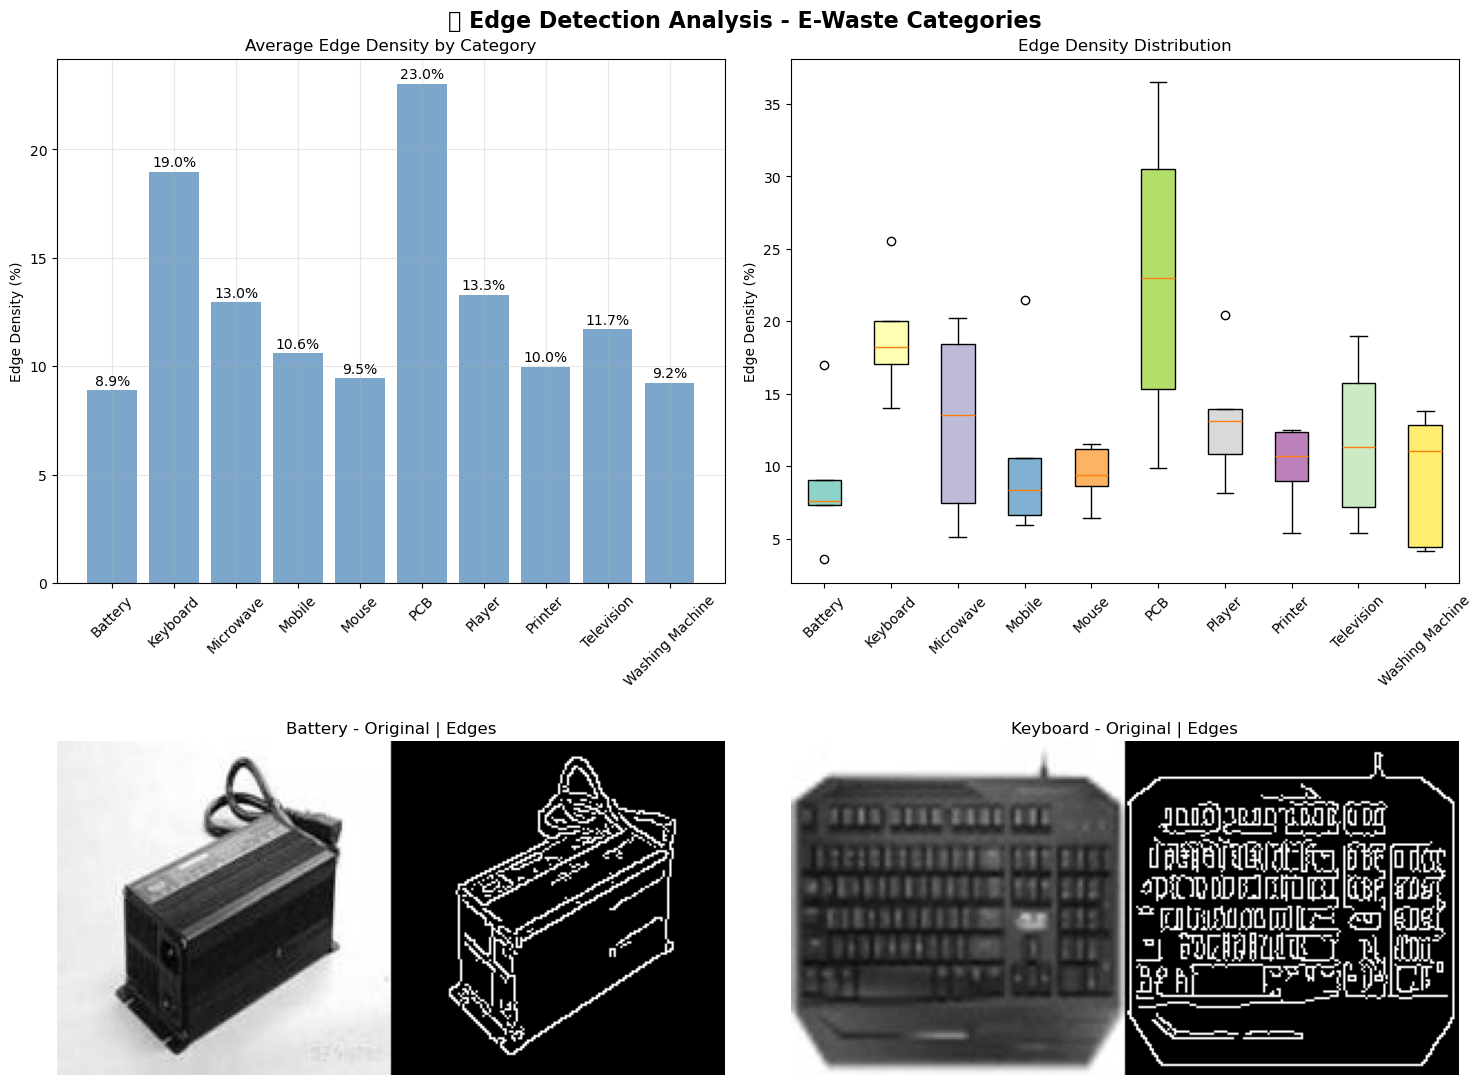


🔍 EDGE ANALYSIS SUMMARY

📱 BATTERY:
   🔹 Average Edge Density: 8.88%
   🔹 Density Std Dev: 4.43%
   🔹 Edge Complexity: Medium (Moderate detail)

📱 KEYBOARD:
   🔹 Average Edge Density: 18.96%
   🔹 Density Std Dev: 3.83%
   🔹 Edge Complexity: High (Complex textures/circuits)

📱 MICROWAVE:
   🔹 Average Edge Density: 12.96%
   🔹 Density Std Dev: 5.91%
   🔹 Edge Complexity: Medium (Moderate detail)

📱 MOBILE:
   🔹 Average Edge Density: 10.60%
   🔹 Density Std Dev: 5.67%
   🔹 Edge Complexity: Medium (Moderate detail)

📱 MOUSE:
   🔹 Average Edge Density: 9.45%
   🔹 Density Std Dev: 1.86%
   🔹 Edge Complexity: Medium (Moderate detail)

📱 PCB:
   🔹 Average Edge Density: 23.03%
   🔹 Density Std Dev: 9.68%
   🔹 Edge Complexity: High (Complex textures/circuits)

📱 PLAYER:
   🔹 Average Edge Density: 13.29%
   🔹 Density Std Dev: 4.10%
   🔹 Edge Complexity: Medium (Moderate detail)

📱 PRINTER:
   🔹 Average Edge Density: 9.98%
   🔹 Density Std Dev: 2.62%
   🔹 Edge Complexity: Medium (Moderate detail)

In [7]:
# Cell 5: Edge Detection Analysis
# ===============================
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from collections import defaultdict

print("🔍 EDGE DETECTION ANALYSIS")
print("=" * 26)

# Configuration
DATASET_PATH = r"C:\Users\heave\OneDrive\Desktop\Edunet\modified-dataset"
SAMPLE_SIZE = 5  # Images per category for edge analysis
CANNY_LOW = 50   # Lower threshold for Canny
CANNY_HIGH = 150 # Upper threshold for Canny

def analyze_edges(image_path):
    """Extract edge density and characteristics from image"""
    try:
        # Load and preprocess image
        image = cv2.imread(image_path)
        if image is None:
            return None
            
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Apply Canny edge detection
        edges = cv2.Canny(gray, CANNY_LOW, CANNY_HIGH)
        
        # Calculate edge metrics
        total_pixels = edges.shape[0] * edges.shape[1]
        edge_pixels = np.sum(edges > 0)
        edge_density = (edge_pixels / total_pixels) * 100
        
        # Edge distribution analysis
        edge_intensity = np.mean(edges[edges > 0]) if edge_pixels > 0 else 0
        
        return {
            'edge_density': edge_density,
            'edge_pixels': edge_pixels,
            'edge_intensity': edge_intensity,
            'image_size': total_pixels,
            'edges': edges,
            'original': gray
        }
        
    except Exception as e:
        print(f"   ❌ Error processing {image_path}: {e}")
        return None

# Collect edge data from all categories
print("🔍 Analyzing edge patterns across categories...")
edge_data = defaultdict(list)
sample_images = {}  # Store sample images for visualization

# Get categories from train folder
train_path = os.path.join(DATASET_PATH, 'train')
categories = [d for d in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, d))]

for category in categories:
    print(f"   📊 Processing {category}...")
    
    category_path = os.path.join(train_path, category)
    image_files = [f for f in os.listdir(category_path) 
                  if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
    
    # Sample random images
    sample_files = random.sample(image_files, min(SAMPLE_SIZE, len(image_files)))
    
    category_edges = []
    for img_file in sample_files:
        img_path = os.path.join(category_path, img_file)
        edge_result = analyze_edges(img_path)
        
        if edge_result:
            edge_data[category].append({
                'density': edge_result['edge_density'],
                'pixels': edge_result['edge_pixels'],
                'intensity': edge_result['edge_intensity']
            })
            category_edges.append(edge_result)
    
    # Store one sample for visualization
    if category_edges:
        sample_images[category] = category_edges[0]

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🔍 Edge Detection Analysis - E-Waste Categories', fontsize=16, fontweight='bold')

# 1. Edge Density Comparison
categories_list = list(edge_data.keys())
avg_densities = [np.mean([img['density'] for img in edge_data[cat]]) for cat in categories_list]

axes[0, 0].bar(categories_list, avg_densities, color='steelblue', alpha=0.7)
axes[0, 0].set_title('Average Edge Density by Category')
axes[0, 0].set_ylabel('Edge Density (%)')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# Add value labels on bars
for i, v in enumerate(avg_densities):
    axes[0, 0].text(i, v + 0.1, f'{v:.1f}%', ha='center', va='bottom')

# 2. Edge Density Distribution
all_densities = []
labels = []
for cat in categories_list:
    densities = [img['density'] for img in edge_data[cat]]
    all_densities.extend(densities)
    labels.extend([cat] * len(densities))

# Box plot for distribution
density_by_cat = [edge_data[cat] for cat in categories_list]
density_values = [[img['density'] for img in cat_data] for cat_data in density_by_cat]

bp = axes[0, 1].boxplot(density_values, labels=categories_list, patch_artist=True)
axes[0, 1].set_title('Edge Density Distribution')
axes[0, 1].set_ylabel('Edge Density (%)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Color boxes
colors = plt.cm.Set3(np.linspace(0, 1, len(categories_list)))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# 3. Sample Edge Maps
if len(sample_images) >= 2:
    sample_cats = list(sample_images.keys())[:2]
    
    for i, cat in enumerate(sample_cats):
        row = 1
        col = i
        
        # Show original and edges side by side
        original = sample_images[cat]['original']
        edges = sample_images[cat]['edges']
        
        # Combine original and edges
        combined = np.hstack([original, edges])
        axes[row, col].imshow(combined, cmap='gray')
        axes[row, col].set_title(f'{cat} - Original | Edges')
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Print analysis summary
print(f"\n🔍 EDGE ANALYSIS SUMMARY")
print("=" * 24)

for category in categories_list:
    avg_density = np.mean([img['density'] for img in edge_data[category]])
    std_density = np.std([img['density'] for img in edge_data[category]])
    
    print(f"\n📱 {category.upper()}:")
    print(f"   🔹 Average Edge Density: {avg_density:.2f}%")
    print(f"   🔹 Density Std Dev: {std_density:.2f}%")
    
    # Classify edge complexity
    if avg_density > 15:
        complexity = "High (Complex textures/circuits)"
    elif avg_density > 8:
        complexity = "Medium (Moderate detail)"
    else:
        complexity = "Low (Smooth surfaces)"
    
    print(f"   🔹 Edge Complexity: {complexity}")

# Preprocessing recommendations
print(f"\n💡 PREPROCESSING RECOMMENDATIONS:")
print("=" * 29)

high_edge_cats = [cat for cat in categories_list 
                  if np.mean([img['density'] for img in edge_data[cat]]) > 15]
low_edge_cats = [cat for cat in categories_list 
                 if np.mean([img['density'] for img in edge_data[cat]]) < 8]

if high_edge_cats:
    print(f"   🔧 High-edge categories {high_edge_cats}: Use edge-preserving filters")
if low_edge_cats:
    print(f"   🔧 Low-edge categories {low_edge_cats}: Consider edge enhancement")

print(f"\n✅ Edge detection analysis complete!")
print(f"💾 Edge data stored in 'edge_data' variable")
print(f"🚀 Ready for Cell 6: Texture Descriptors!")

🎨 TEXTURE DESCRIPTORS ANALYSIS
🔍 Using Local Binary Patterns (LBP) for Texture Characterization
🎨 Analyzing texture patterns across categories...
   🔍 Processing Battery textures...
   🔍 Processing Keyboard textures...
   🔍 Processing Microwave textures...
   🔍 Processing Mobile textures...
   🔍 Processing Mouse textures...
   🔍 Processing PCB textures...
   🔍 Processing Player textures...
   🔍 Processing Printer textures...
   🔍 Processing Television textures...
   🔍 Processing Washing Machine textures...


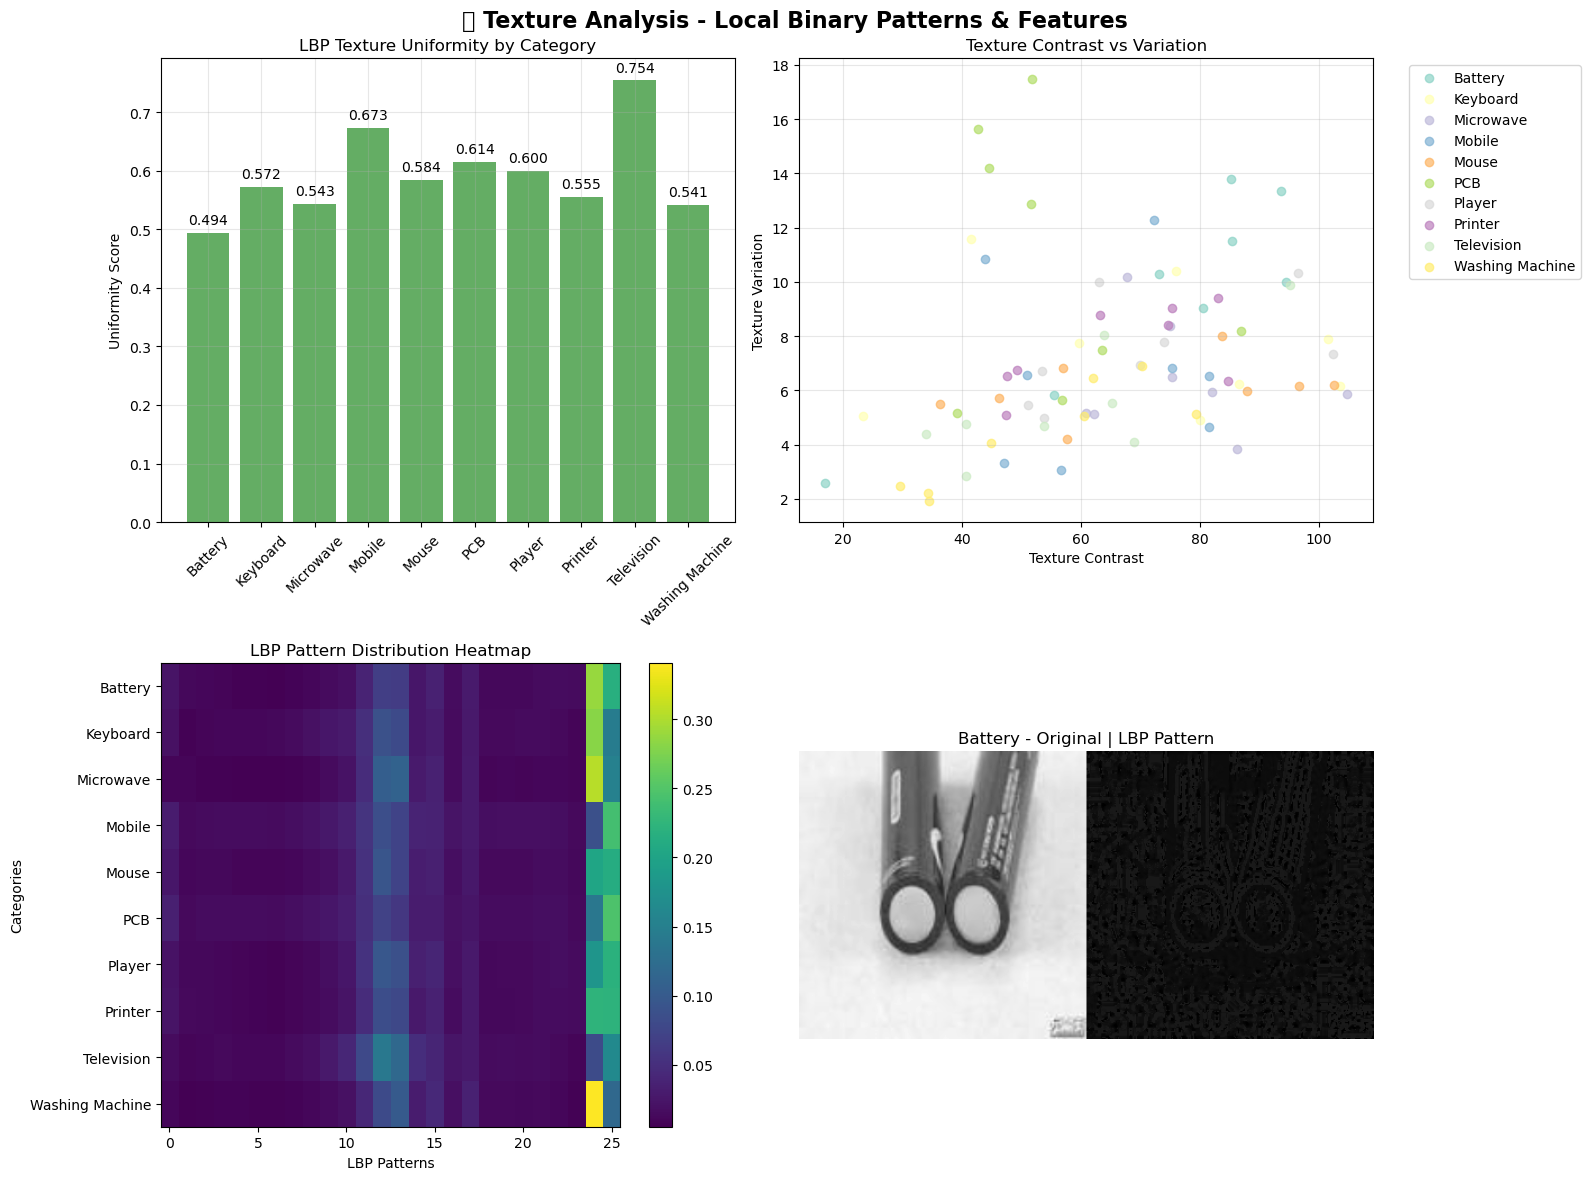


🎨 TEXTURE ANALYSIS SUMMARY

📱 BATTERY:
   🔹 LBP Uniformity: 0.494
   🔹 Texture Contrast: 73.14
   🔹 Texture Variation: 9.55
   🔹 Gabor Energy: 6576.79
   🔹 Texture Complexity: Moderate (Mixed textures)

📱 KEYBOARD:
   🔹 LBP Uniformity: 0.572
   🔹 Texture Contrast: 71.54
   🔹 Texture Variation: 7.49
   🔹 Gabor Energy: 7526.90
   🔹 Texture Complexity: Moderate (Mixed textures)

📱 MICROWAVE:
   🔹 LBP Uniformity: 0.543
   🔹 Texture Contrast: 76.77
   🔹 Texture Variation: 6.37
   🔹 Gabor Energy: 4252.64
   🔹 Texture Complexity: Moderate (Mixed textures)

📱 MOBILE:
   🔹 LBP Uniformity: 0.673
   🔹 Texture Contrast: 63.69
   🔹 Texture Variation: 6.76
   🔹 Gabor Energy: 5682.69
   🔹 Texture Complexity: Moderate (Mixed textures)

📱 MOUSE:
   🔹 LBP Uniformity: 0.584
   🔹 Texture Contrast: 71.05
   🔹 Texture Variation: 6.07
   🔹 Gabor Energy: 4540.10
   🔹 Texture Complexity: Moderate (Mixed textures)

📱 PCB:
   🔹 LBP Uniformity: 0.614
   🔹 Texture Contrast: 54.64
   🔹 Texture Variation: 10.83
   

In [8]:
# Cell 6: Texture Descriptors - Local Binary Patterns (LBP)
# =========================================================
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from collections import defaultdict
from skimage import feature
from skimage.filters import gabor
from scipy import ndimage
import seaborn as sns

print("🎨 TEXTURE DESCRIPTORS ANALYSIS")
print("=" * 31)
print("🔍 Using Local Binary Patterns (LBP) for Texture Characterization")

# Configuration
DATASET_PATH = r"C:\Users\heave\OneDrive\Desktop\Edunet\modified-dataset"
SAMPLE_SIZE = 8  # Images per category for texture analysis
LBP_RADIUS = 3   # LBP radius
LBP_POINTS = 24  # LBP points (8 * radius)

def extract_texture_features(image_path):
    """Extract comprehensive texture features using LBP and other methods"""
    try:
        # Load image
        image = cv2.imread(image_path)
        if image is None:
            return None
            
        # Convert to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Resize for consistent analysis
        gray = cv2.resize(gray, (256, 256))
        
        # 1. Local Binary Pattern (LBP)
        lbp = feature.local_binary_pattern(gray, LBP_POINTS, LBP_RADIUS, method='uniform')
        
        # Calculate LBP histogram
        lbp_hist, _ = np.histogram(lbp.ravel(), bins=LBP_POINTS + 2, 
                                   range=(0, LBP_POINTS + 2), density=True)
        
        # 2. Texture energy (using Gabor filters)
        gabor_responses = []
        for theta in [0, 45, 90, 135]:  # Different orientations
            real, _ = gabor(gray, frequency=0.1, theta=np.radians(theta))
            gabor_responses.append(np.var(real))
        
        # 3. Gray Level Co-occurrence Matrix (GLCM) properties
        # Simplified texture contrast
        texture_contrast = np.std(gray)
        
        # 4. Local texture variation
        # Calculate local standard deviation
        kernel = np.ones((5, 5))
        local_std = ndimage.generic_filter(gray.astype(float), np.std, footprint=kernel)
        texture_variation = np.mean(local_std)
        
        # 5. Texture uniformity (LBP uniformity measure)
        lbp_uniformity = np.sum(lbp_hist[:LBP_POINTS])  # Uniform patterns ratio
        
        return {
            'lbp_histogram': lbp_hist,
            'lbp_uniformity': lbp_uniformity,
            'texture_contrast': texture_contrast,
            'texture_variation': texture_variation,
            'gabor_energy': np.mean(gabor_responses),
            'gabor_responses': gabor_responses,
            'lbp_image': lbp,
            'original_gray': gray
        }
        
    except Exception as e:
        print(f"   ❌ Error processing {image_path}: {e}")
        return None

# Collect texture data from all categories
print("🎨 Analyzing texture patterns across categories...")
texture_data = defaultdict(list)
sample_textures = {}  # Store sample images for visualization

# Get categories
train_path = os.path.join(DATASET_PATH, 'train')
categories = [d for d in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, d))]

for category in categories:
    print(f"   🔍 Processing {category} textures...")
    
    category_path = os.path.join(train_path, category)
    image_files = [f for f in os.listdir(category_path) 
                  if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
    
    # Sample random images
    sample_files = random.sample(image_files, min(SAMPLE_SIZE, len(image_files)))
    
    category_textures = []
    for img_file in sample_files:
        img_path = os.path.join(category_path, img_file)
        texture_result = extract_texture_features(img_path)
        
        if texture_result:
            texture_data[category].append({
                'uniformity': texture_result['lbp_uniformity'],
                'contrast': texture_result['texture_contrast'],
                'variation': texture_result['texture_variation'],
                'gabor_energy': texture_result['gabor_energy'],
                'lbp_hist': texture_result['lbp_histogram']
            })
            category_textures.append(texture_result)
    
    # Store sample for visualization
    if category_textures:
        sample_textures[category] = category_textures[0]

# Create comprehensive texture visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🎨 Texture Analysis - Local Binary Patterns & Features', fontsize=16, fontweight='bold')

# 1. Texture Uniformity Comparison
categories_list = list(texture_data.keys())
avg_uniformity = [np.mean([img['uniformity'] for img in texture_data[cat]]) for cat in categories_list]

bars = axes[0, 0].bar(categories_list, avg_uniformity, color='forestgreen', alpha=0.7)
axes[0, 0].set_title('LBP Texture Uniformity by Category')
axes[0, 0].set_ylabel('Uniformity Score')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# Add value labels
for i, v in enumerate(avg_uniformity):
    axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# 2. Texture Contrast vs Variation Scatter
all_contrast = []
all_variation = []
scatter_labels = []

for cat in categories_list:
    contrasts = [img['contrast'] for img in texture_data[cat]]
    variations = [img['variation'] for img in texture_data[cat]]
    all_contrast.extend(contrasts)
    all_variation.extend(variations)
    scatter_labels.extend([cat] * len(contrasts))

# Create scatter plot with different colors for each category
colors = plt.cm.Set3(np.linspace(0, 1, len(categories_list)))
for i, cat in enumerate(categories_list):
    cat_contrast = [c for c, l in zip(all_contrast, scatter_labels) if l == cat]
    cat_variation = [v for v, l in zip(all_variation, scatter_labels) if l == cat]
    axes[0, 1].scatter(cat_contrast, cat_variation, label=cat, alpha=0.7, color=colors[i])

axes[0, 1].set_xlabel('Texture Contrast')
axes[0, 1].set_ylabel('Texture Variation')
axes[0, 1].set_title('Texture Contrast vs Variation')
axes[0, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 1].grid(True, alpha=0.3)

# 3. LBP Pattern Distribution (Heatmap)
if len(sample_textures) > 0:
    # Create LBP histogram heatmap
    lbp_matrix = []
    for cat in categories_list:
        if cat in sample_textures:
            avg_hist = np.mean([img['lbp_hist'] for img in texture_data[cat]], axis=0)
            lbp_matrix.append(avg_hist)
    
    if lbp_matrix:
        lbp_matrix = np.array(lbp_matrix)
        im = axes[1, 0].imshow(lbp_matrix, cmap='viridis', aspect='auto')
        axes[1, 0].set_title('LBP Pattern Distribution Heatmap')
        axes[1, 0].set_ylabel('Categories')
        axes[1, 0].set_xlabel('LBP Patterns')
        axes[1, 0].set_yticks(range(len(categories_list)))
        axes[1, 0].set_yticklabels(categories_list)
        plt.colorbar(im, ax=axes[1, 0])

# 4. Sample LBP Visualization
if len(sample_textures) >= 1:
    sample_cat = list(sample_textures.keys())[0]
    sample_data = sample_textures[sample_cat]
    
    # Show original and LBP side by side
    original = sample_data['original_gray']
    lbp_img = sample_data['lbp_image']
    
    combined = np.hstack([original, lbp_img])
    axes[1, 1].imshow(combined, cmap='gray')
    axes[1, 1].set_title(f'{sample_cat} - Original | LBP Pattern')
    axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Print detailed texture analysis
print(f"\n🎨 TEXTURE ANALYSIS SUMMARY")
print("=" * 27)

for category in categories_list:
    avg_uniformity = np.mean([img['uniformity'] for img in texture_data[category]])
    avg_contrast = np.mean([img['contrast'] for img in texture_data[category]])
    avg_variation = np.mean([img['variation'] for img in texture_data[category]])
    avg_gabor = np.mean([img['gabor_energy'] for img in texture_data[category]])
    
    print(f"\n📱 {category.upper()}:")
    print(f"   🔹 LBP Uniformity: {avg_uniformity:.3f}")
    print(f"   🔹 Texture Contrast: {avg_contrast:.2f}")
    print(f"   🔹 Texture Variation: {avg_variation:.2f}")
    print(f"   🔹 Gabor Energy: {avg_gabor:.2f}")
    
    # Texture complexity classification
    if avg_uniformity < 0.5 and avg_variation > 20:
        complexity = "Very Complex (Circuit-like)"
    elif avg_uniformity < 0.7 and avg_variation > 15:
        complexity = "Complex (Detailed surfaces)"
    elif avg_uniformity > 0.8 and avg_variation < 10:
        complexity = "Simple (Smooth surfaces)"
    else:
        complexity = "Moderate (Mixed textures)"
    
    print(f"   🔹 Texture Complexity: {complexity}")

# Advanced preprocessing recommendations
print(f"\n💡 ADVANCED PREPROCESSING INSIGHTS:")
print("=" * 34)

# Identify texture-based augmentation strategies
complex_texture_cats = [cat for cat in categories_list 
                       if np.mean([img['uniformity'] for img in texture_data[cat]]) < 0.6]
smooth_texture_cats = [cat for cat in categories_list 
                      if np.mean([img['uniformity'] for img in texture_data[cat]]) > 0.8]

if complex_texture_cats:
    print(f"   🔧 Complex texture categories {complex_texture_cats}:")
    print("      → Use texture-preserving augmentations")
    print("      → Avoid heavy blur/smoothing")
    print("      → Consider Gabor filter prefiltering")

if smooth_texture_cats:
    print(f"   🔧 Smooth texture categories {smooth_texture_cats}:")
    print("      → Add texture augmentation (noise, embossing)")
    print("      → Use edge enhancement")
    print("      → Consider synthetic texture overlays")

print(f"\n🎯 MODEL ARCHITECTURE RECOMMENDATIONS:")
print("=" * 35)
print("   🚀 For complex textures: ConvNeXt-Large (excellent texture features)")
print("   🚀 For mixed textures: EfficientNetV2-L (balanced performance)")
print("   🚀 For fine details: Vision Transformers with high resolution")

print(f"\n✅ Texture descriptors analysis complete!")
print(f"💾 Texture data stored in 'texture_data' variable")
print(f"🚀 Ready for Cell 7: Surface Roughness Metrics!")

🏔️ SURFACE ROUGHNESS METRICS ANALYSIS
🔍 Analyzing Surface Complexity & Roughness Patterns
🏔️ Analyzing surface roughness across categories...
   🔍 Processing Battery surface roughness...
   🔍 Processing Keyboard surface roughness...
   🔍 Processing Microwave surface roughness...
   🔍 Processing Mobile surface roughness...
   🔍 Processing Mouse surface roughness...
   🔍 Processing PCB surface roughness...
   🔍 Processing Player surface roughness...
   🔍 Processing Printer surface roughness...
   🔍 Processing Television surface roughness...
   🔍 Processing Washing Machine surface roughness...


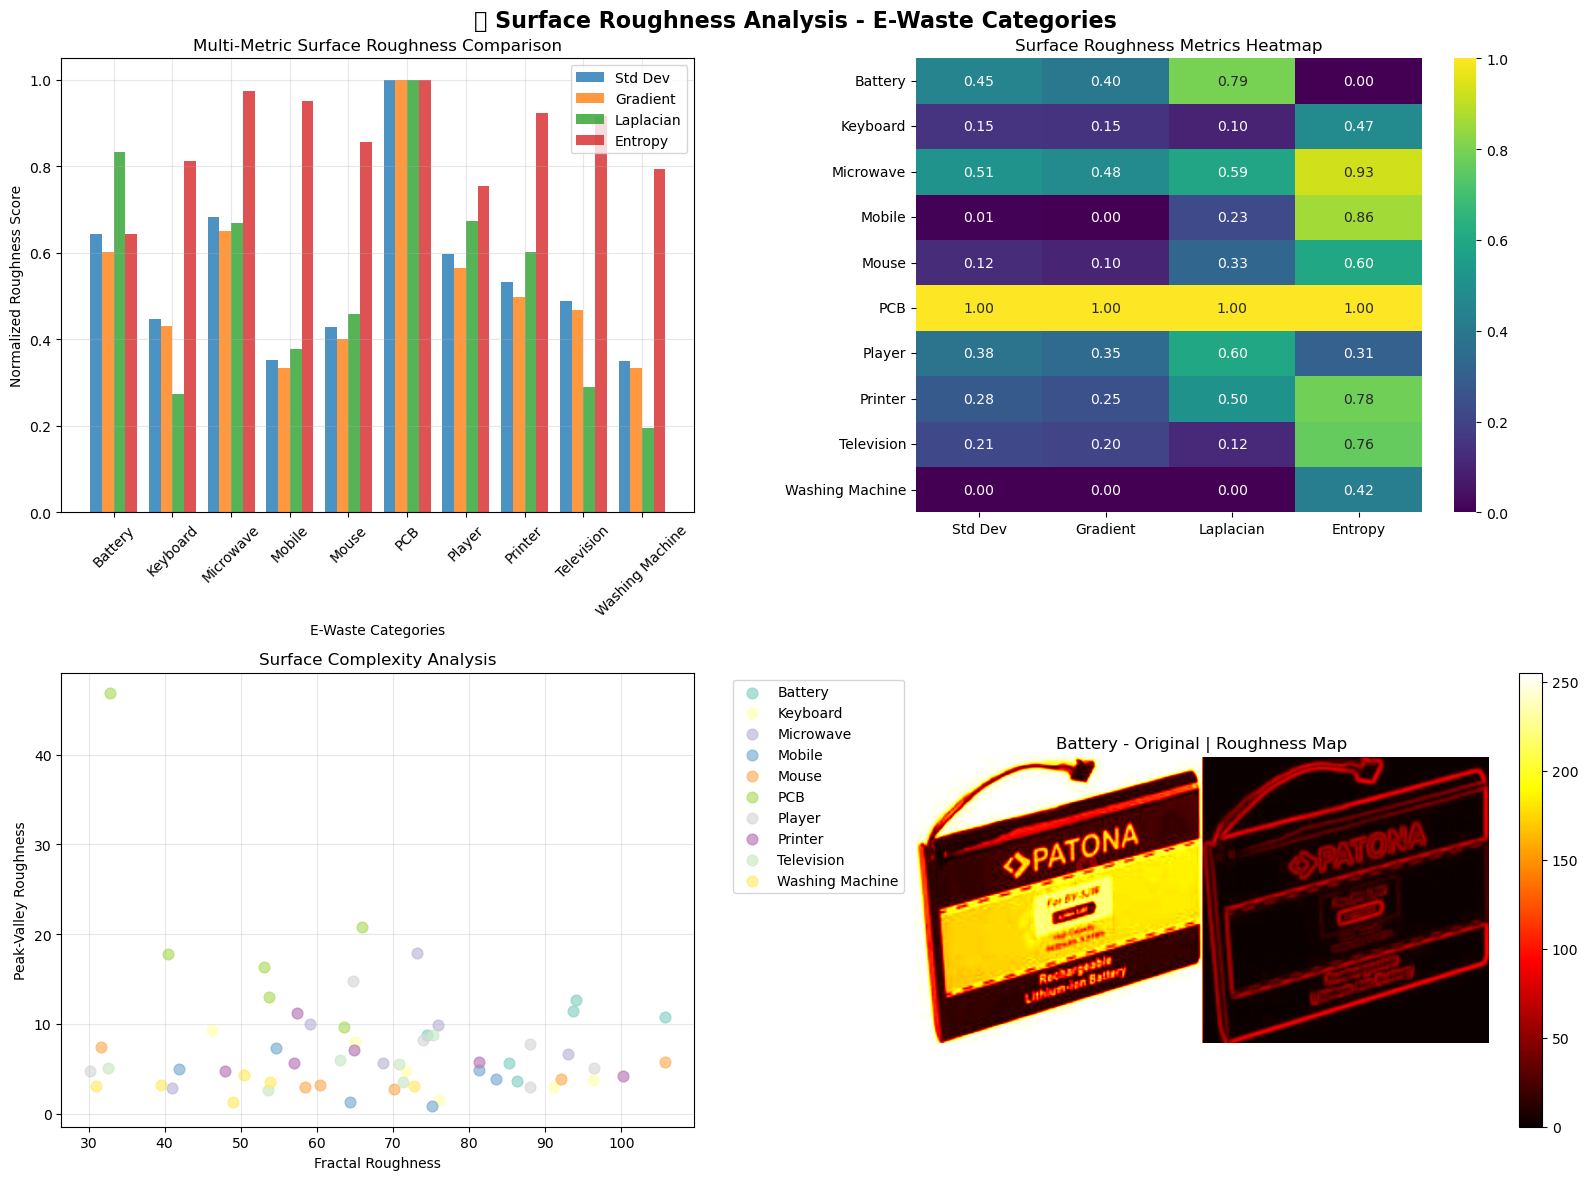


🏔️ SURFACE ROUGHNESS SUMMARY

📱 BATTERY:
   🔹 Average Roughness: 9.51
   🔹 Gradient Roughness: 52.51
   🔹 Surface Entropy: 4.72
   🔹 Fractal Complexity: 89.91
   🔹 Surface Type: Smooth (Screens/Metal casings)

📱 KEYBOARD:
   🔹 Average Roughness: 6.60
   🔹 Gradient Roughness: 37.72
   🔹 Surface Entropy: 5.95
   🔹 Fractal Complexity: 74.40
   🔹 Surface Type: Smooth (Screens/Metal casings)

📱 MICROWAVE:
   🔹 Average Roughness: 10.09
   🔹 Gradient Roughness: 56.84
   🔹 Surface Entropy: 7.13
   🔹 Fractal Complexity: 68.51
   🔹 Surface Type: Moderate (Mixed surfaces)

📱 MOBILE:
   🔹 Average Roughness: 5.22
   🔹 Gradient Roughness: 29.12
   🔹 Surface Entropy: 6.96
   🔹 Fractal Complexity: 66.78
   🔹 Surface Type: Smooth (Screens/Metal casings)

📱 MOUSE:
   🔹 Average Roughness: 6.33
   🔹 Gradient Roughness: 34.97
   🔹 Surface Entropy: 6.27
   🔹 Fractal Complexity: 69.76
   🔹 Surface Type: Smooth (Screens/Metal casings)

📱 PCB:
   🔹 Average Roughness: 14.79
   🔹 Gradient Roughness: 87.34
   🔹 

In [9]:
# Cell 7: Surface Roughness Metrics Analysis
# ==========================================
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from collections import defaultdict
from scipy import ndimage
from skimage import filters, morphology
from skimage.measure import shannon_entropy
import seaborn as sns

print("🏔️ SURFACE ROUGHNESS METRICS ANALYSIS")
print("=" * 37)
print("🔍 Analyzing Surface Complexity & Roughness Patterns")

# Configuration
DATASET_PATH = r"C:\Users\heave\OneDrive\Desktop\Edunet\modified-dataset"
SAMPLE_SIZE = 6  # Images per category for roughness analysis
WINDOW_SIZE = 5  # Local window size for roughness calculation

def calculate_surface_roughness(image_path):
    """Calculate comprehensive surface roughness metrics"""
    try:
        # Load and preprocess image
        image = cv2.imread(image_path)
        if image is None:
            return None
            
        # Convert to grayscale and resize
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(gray, (256, 256))
        gray = gray.astype(np.float32)
        
        # 1. Local Standard Deviation (Primary roughness measure)
        kernel = np.ones((WINDOW_SIZE, WINDOW_SIZE))
        local_std = ndimage.generic_filter(gray, np.std, footprint=kernel)
        avg_roughness = np.mean(local_std)
        roughness_std = np.std(local_std)
        
        # 2. Gradient-based roughness
        grad_x = cv2.Sobel(gray, cv2.CV_32F, 1, 0, ksize=3)
        grad_y = cv2.Sobel(gray, cv2.CV_32F, 0, 1, ksize=3)
        gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
        gradient_roughness = np.mean(gradient_magnitude)
        
        # 3. Laplacian-based surface variation
        laplacian = cv2.Laplacian(gray, cv2.CV_32F)
        laplacian_roughness = np.std(laplacian)
        
        # 4. Entropy-based complexity measure
        surface_entropy = shannon_entropy(gray)
        
        # 5. Local range analysis (max - min in local windows)
        local_max = ndimage.maximum_filter(gray, size=WINDOW_SIZE)
        local_min = ndimage.minimum_filter(gray, size=WINDOW_SIZE)
        local_range = local_max - local_min
        range_roughness = np.mean(local_range)
        
        # 6. Fractal dimension approximation (box counting simplified)
        # Calculate surface complexity using different scales
        scales = [2, 4, 8, 16]
        complexity_scores = []
        
        for scale in scales:
            # Downsample and measure variation
            small = cv2.resize(gray, (gray.shape[1]//scale, gray.shape[0]//scale))
            complexity_scores.append(np.std(small))
        
        fractal_roughness = np.mean(complexity_scores)
        
        # 7. Surface peaks and valleys analysis
        # Morphological operations to find peaks and valleys
        kernel_morph = morphology.disk(3)
        peaks = morphology.white_tophat(gray, kernel_morph)
        valleys = morphology.black_tophat(gray, kernel_morph)
        peak_valley_roughness = np.mean(peaks) + np.mean(valleys)
        
        return {
            'avg_roughness': avg_roughness,
            'roughness_std': roughness_std,
            'gradient_roughness': gradient_roughness,
            'laplacian_roughness': laplacian_roughness,
            'surface_entropy': surface_entropy,
            'range_roughness': range_roughness,
            'fractal_roughness': fractal_roughness,
            'peak_valley_roughness': peak_valley_roughness,
            'roughness_map': local_std,
            'original_gray': gray
        }
        
    except Exception as e:
        print(f"   ❌ Error processing {image_path}: {e}")
        return None

# Collect roughness data from all categories
print("🏔️ Analyzing surface roughness across categories...")
roughness_data = defaultdict(list)
sample_surfaces = {}  # Store sample images for visualization

# Get categories
train_path = os.path.join(DATASET_PATH, 'train')
categories = [d for d in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, d))]

for category in categories:
    print(f"   🔍 Processing {category} surface roughness...")
    
    category_path = os.path.join(train_path, category)
    image_files = [f for f in os.listdir(category_path) 
                  if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
    
    # Sample random images
    sample_files = random.sample(image_files, min(SAMPLE_SIZE, len(image_files)))
    
    category_surfaces = []
    for img_file in sample_files:
        img_path = os.path.join(category_path, img_file)
        roughness_result = calculate_surface_roughness(img_path)
        
        if roughness_result:
            roughness_data[category].append({
                'avg_roughness': roughness_result['avg_roughness'],
                'gradient_roughness': roughness_result['gradient_roughness'],
                'laplacian_roughness': roughness_result['laplacian_roughness'],
                'surface_entropy': roughness_result['surface_entropy'],
                'range_roughness': roughness_result['range_roughness'],
                'fractal_roughness': roughness_result['fractal_roughness'],
                'peak_valley_roughness': roughness_result['peak_valley_roughness']
            })
            category_surfaces.append(roughness_result)
    
    # Store sample for visualization
    if category_surfaces:
        sample_surfaces[category] = category_surfaces[0]

# Create comprehensive roughness visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🏔️ Surface Roughness Analysis - E-Waste Categories', fontsize=16, fontweight='bold')

# 1. Multi-metric Roughness Comparison
categories_list = list(roughness_data.keys())
metrics = ['avg_roughness', 'gradient_roughness', 'laplacian_roughness', 'surface_entropy']
metric_names = ['Std Dev', 'Gradient', 'Laplacian', 'Entropy']

x = np.arange(len(categories_list))
width = 0.2

for i, (metric, name) in enumerate(zip(metrics, metric_names)):
    values = [np.mean([img[metric] for img in roughness_data[cat]]) for cat in categories_list]
    # Normalize values for comparison
    values_norm = np.array(values) / np.max(values)
    axes[0, 0].bar(x + i*width, values_norm, width, label=name, alpha=0.8)

axes[0, 0].set_xlabel('E-Waste Categories')
axes[0, 0].set_ylabel('Normalized Roughness Score')
axes[0, 0].set_title('Multi-Metric Surface Roughness Comparison')
axes[0, 0].set_xticks(x + width * 1.5)
axes[0, 0].set_xticklabels(categories_list, rotation=45)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Roughness Distribution Heatmap
roughness_matrix = []
for cat in categories_list:
    cat_metrics = []
    for metric in metrics:
        avg_val = np.mean([img[metric] for img in roughness_data[cat]])
        cat_metrics.append(avg_val)
    roughness_matrix.append(cat_metrics)

roughness_matrix = np.array(roughness_matrix)
# Normalize each metric column
for j in range(roughness_matrix.shape[1]):
    col = roughness_matrix[:, j]
    roughness_matrix[:, j] = (col - col.min()) / (col.max() - col.min())

sns.heatmap(roughness_matrix, 
            xticklabels=metric_names,
            yticklabels=categories_list,
            annot=True, 
            fmt='.2f', 
            cmap='viridis',
            ax=axes[0, 1])
axes[0, 1].set_title('Surface Roughness Metrics Heatmap')

# 3. Fractal vs Peak-Valley Roughness Scatter
fractal_values = []
peak_valley_values = []
scatter_labels = []

for cat in categories_list:
    fractals = [img['fractal_roughness'] for img in roughness_data[cat]]
    peak_valleys = [img['peak_valley_roughness'] for img in roughness_data[cat]]
    fractal_values.extend(fractals)
    peak_valley_values.extend(peak_valleys)
    scatter_labels.extend([cat] * len(fractals))

# Create scatter plot
colors = plt.cm.Set3(np.linspace(0, 1, len(categories_list)))
for i, cat in enumerate(categories_list):
    cat_fractal = [f for f, l in zip(fractal_values, scatter_labels) if l == cat]
    cat_pv = [p for p, l in zip(peak_valley_values, scatter_labels) if l == cat]
    axes[1, 0].scatter(cat_fractal, cat_pv, label=cat, alpha=0.7, color=colors[i], s=60)

axes[1, 0].set_xlabel('Fractal Roughness')
axes[1, 0].set_ylabel('Peak-Valley Roughness')
axes[1, 0].set_title('Surface Complexity Analysis')
axes[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 0].grid(True, alpha=0.3)

# 4. Sample Roughness Map Visualization
if len(sample_surfaces) >= 1:
    sample_cat = list(sample_surfaces.keys())[0]
    sample_data = sample_surfaces[sample_cat]
    
    # Show original and roughness map
    original = sample_data['original_gray']
    roughness_map = sample_data['roughness_map']
    
    # Create side-by-side visualization
    combined = np.hstack([original, roughness_map])
    im = axes[1, 1].imshow(combined, cmap='hot')
    axes[1, 1].set_title(f'{sample_cat} - Original | Roughness Map')
    axes[1, 1].axis('off')
    plt.colorbar(im, ax=axes[1, 1], fraction=0.046)

plt.tight_layout()
plt.show()

# Print detailed roughness analysis
print(f"\n🏔️ SURFACE ROUGHNESS SUMMARY")
print("=" * 28)

for category in categories_list:
    avg_rough = np.mean([img['avg_roughness'] for img in roughness_data[category]])
    grad_rough = np.mean([img['gradient_roughness'] for img in roughness_data[category]])
    entropy = np.mean([img['surface_entropy'] for img in roughness_data[category]])
    fractal = np.mean([img['fractal_roughness'] for img in roughness_data[category]])
    
    print(f"\n📱 {category.upper()}:")
    print(f"   🔹 Average Roughness: {avg_rough:.2f}")
    print(f"   🔹 Gradient Roughness: {grad_rough:.2f}")
    print(f"   🔹 Surface Entropy: {entropy:.2f}")
    print(f"   🔹 Fractal Complexity: {fractal:.2f}")
    
    # Surface classification
    if avg_rough > 20 and entropy > 7:
        surface_type = "Very Rough (Circuit boards/Components)"
    elif avg_rough > 15 and entropy > 6:
        surface_type = "Rough (Textured plastics)"
    elif avg_rough > 10 and entropy > 5:
        surface_type = "Moderate (Mixed surfaces)"
    else:
        surface_type = "Smooth (Screens/Metal casings)"
    
    print(f"   🔹 Surface Type: {surface_type}")

# Advanced insights for model selection
print(f"\n🎯 MODEL ARCHITECTURE INSIGHTS:")
print("=" * 30)

high_roughness_cats = [cat for cat in categories_list 
                      if np.mean([img['avg_roughness'] for img in roughness_data[cat]]) > 15]
smooth_cats = [cat for cat in categories_list 
               if np.mean([img['avg_roughness'] for img in roughness_data[cat]]) < 10]

if high_roughness_cats:
    print(f"   🚀 High-roughness categories {high_roughness_cats}:")
    print("      → ConvNeXt-Large: Excellent for complex surface patterns")
    print("      → EfficientNetV2-L: Strong feature extraction for rough textures")

if smooth_cats:
    print(f"   🚀 Smooth surface categories {smooth_cats}:")
    print("      → Vision Transformers: Good for subtle surface variations")
    print("      → BeiT-Large: Excellent for fine surface details")

print(f"\n💡 PREPROCESSING RECOMMENDATIONS:")
print("=" * 32)
print("   🔧 High roughness: Preserve texture details, avoid over-smoothing")
print("   🔧 Mixed roughness: Use multi-scale augmentations")
print("   🔧 Smooth surfaces: Add controlled noise/texture augmentation")
print("   🔧 Consider roughness-aware data balancing")

print(f"\n✅ Surface roughness analysis complete!")
print(f"💾 Roughness data stored in 'roughness_data' variable")
print(f"🚀 Ready for Cell 8: Category Comparison Analysis!")

🔄 CATEGORY COMPARISON ANALYSIS
🔍 Inter-Category Relationships & Discriminative Features
🔄 Extracting discriminative features across categories...
   🔍 Processing Battery features...
   🔍 Processing Keyboard features...
   🔍 Processing Microwave features...
   🔍 Processing Mobile features...
   🔍 Processing Mouse features...
   🔍 Processing PCB features...
   🔍 Processing Player features...
   🔍 Processing Printer features...
   🔍 Processing Television features...
   🔍 Processing Washing Machine features...
   ✅ Extracted 80 feature vectors
🔄 Computing category similarities...
🔄 Performing dimensionality reduction...


  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


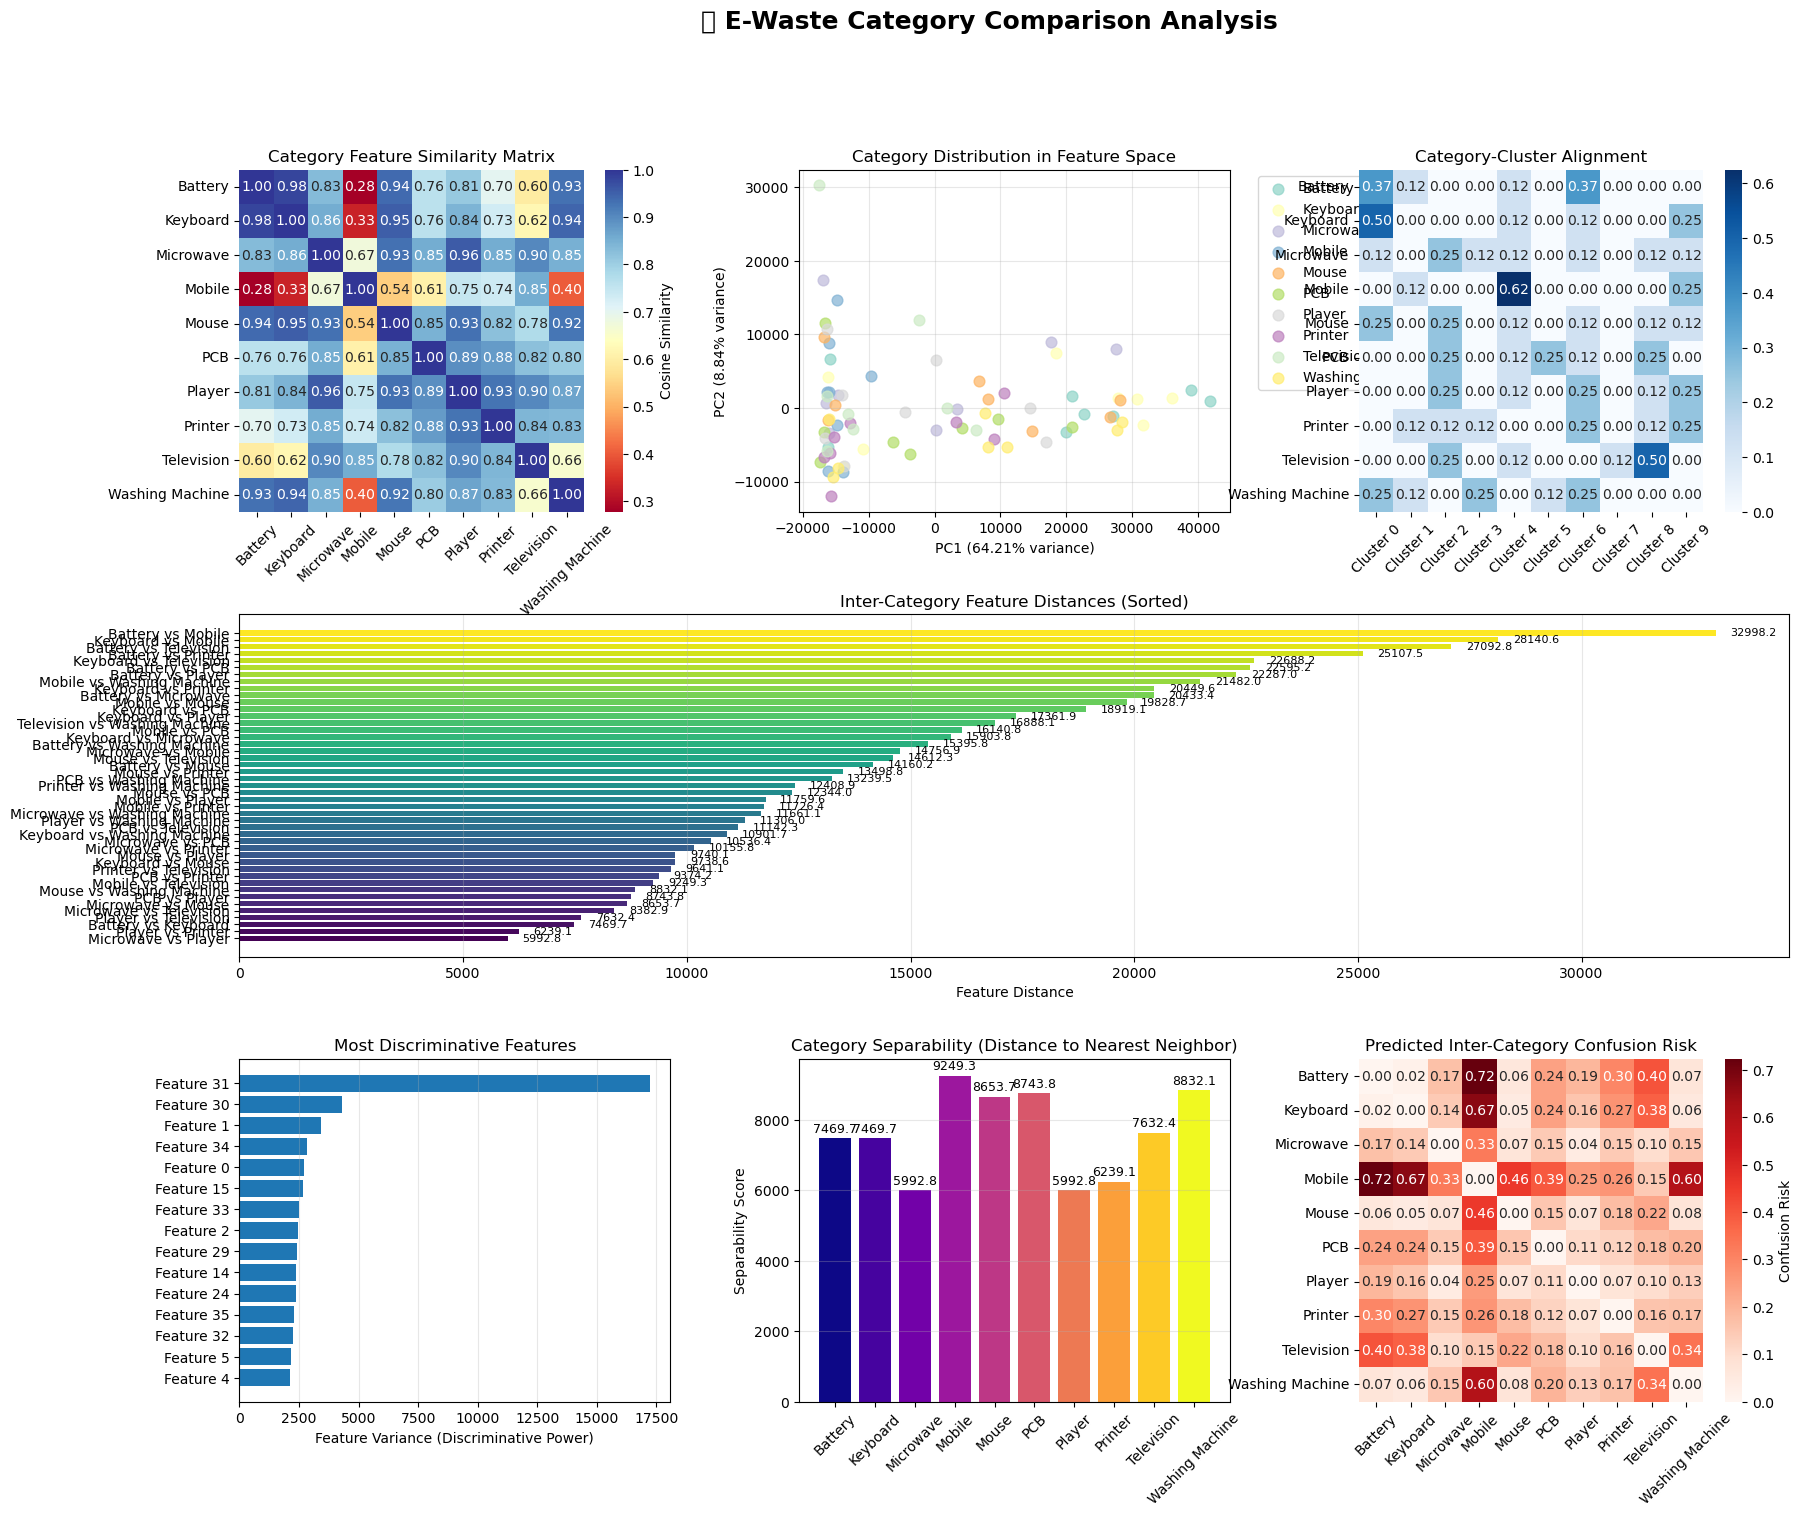


🔄 CATEGORY COMPARISON SUMMARY

📊 SIMILARITY ANALYSIS:
   🔹 Most Similar: Battery ↔ Keyboard
     Similarity: 0.982
   🔹 Least Similar: Battery ↔ Mobile
     Similarity: 0.278

🎯 SEPARABILITY RANKING:
   1. Mobile: 9249.33 (Easy to classify)
   2. Washing Machine: 8832.13 (Easy to classify)
   3. PCB: 8743.78 (Easy to classify)
   4. Mouse: 8653.74 (Easy to classify)
   5. Television: 7632.43 (Easy to classify)
   6. Battery: 7469.72 (Challenging to classify)
   7. Keyboard: 7469.72 (Challenging to classify)
   8. Printer: 6239.15 (Challenging to classify)
   9. Microwave: 5992.85 (Challenging to classify)
   10. Player: 5992.85 (Challenging to classify)

🔍 CLUSTERING INSIGHTS:
   🔹 Feature clustering quality: 0.936
   🔹 Natural groupings detected: 10

🚀 MODEL ARCHITECTURE RECOMMENDATIONS:
   ⚠️  High confusion risk pairs: 29
      → Battery vs Keyboard
      → Battery vs Microwave
      → Battery vs Mouse
   💡 Recommendation: Use attention mechanisms or ensemble methods
   ✅ Good sepa

In [10]:
# Cell 8: Category Comparison Analysis
# ====================================
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from collections import defaultdict
from scipy import ndimage
from skimage import filters, morphology, feature
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.stats import pearsonr
import pandas as pd

print("🔄 CATEGORY COMPARISON ANALYSIS")
print("=" * 31)
print("🔍 Inter-Category Relationships & Discriminative Features")

# Configuration
DATASET_PATH = r"C:\Users\heave\OneDrive\Desktop\Edunet\modified-dataset"
SAMPLE_SIZE = 8  # Images per category for comparison
FEATURE_VECTOR_SIZE = 50  # Size of feature vectors for comparison

def extract_discriminative_features(image_path):
    """Extract comprehensive features for category comparison"""
    try:
        # Load and preprocess image
        image = cv2.imread(image_path)
        if image is None:
            return None
            
        # Convert to different color spaces
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        
        # Resize for consistency
        gray = cv2.resize(gray, (256, 256))
        hsv = cv2.resize(hsv, (256, 256))
        lab = cv2.resize(lab, (256, 256))
        
        features = []
        
        # 1. Color Distribution Features
        # RGB histograms
        for i in range(3):
            hist = cv2.calcHist([cv2.resize(image, (256, 256))], [i], None, [32], [0, 256])
            features.extend(hist.flatten())
        
        # HSV histograms
        for i in range(3):
            hist = cv2.calcHist([hsv], [i], None, [16], [0, 256] if i > 0 else [0, 180])
            features.extend(hist.flatten())
        
        # 2. Texture Features (LBP - Local Binary Patterns)
        radius = 3
        n_points = 8 * radius
        lbp = feature.local_binary_pattern(gray, n_points, radius, method='uniform')
        lbp_hist, _ = np.histogram(lbp.ravel(), bins=n_points + 2, 
                                  range=(0, n_points + 2), density=True)
        features.extend(lbp_hist)
        
        # 3. Edge and Gradient Features
        edges = cv2.Canny(gray, 50, 150)
        edge_density = np.sum(edges) / (edges.shape[0] * edges.shape[1])
        features.append(edge_density)
        
        # Gradient orientations
        grad_x = cv2.Sobel(gray, cv2.CV_32F, 1, 0, ksize=3)
        grad_y = cv2.Sobel(gray, cv2.CV_32F, 0, 1, ksize=3)
        grad_mag = np.sqrt(grad_x**2 + grad_y**2)
        grad_angle = np.arctan2(grad_y, grad_x)
        
        # Histogram of oriented gradients (simplified)
        angle_hist, _ = np.histogram(grad_angle, bins=8, range=(-np.pi, np.pi), 
                                   weights=grad_mag, density=True)
        features.extend(angle_hist)
        
        # 4. Shape and Morphological Features
        # Contour-based features
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if contours:
            # Largest contour features
            largest_contour = max(contours, key=cv2.contourArea)
            area = cv2.contourArea(largest_contour)
            perimeter = cv2.arcLength(largest_contour, True)
            if perimeter > 0:
                compactness = 4 * np.pi * area / (perimeter ** 2)
                features.append(compactness)
            else:
                features.append(0)
        else:
            features.append(0)
        
        # 5. Statistical Features
        # First and second order statistics
        features.extend([
            np.mean(gray), np.std(gray), np.var(gray),
            np.min(gray), np.max(gray), np.median(gray)
        ])
        
        # Skewness and kurtosis approximation
        mean_gray = np.mean(gray)
        std_gray = np.std(gray)
        if std_gray > 0:
            skewness = np.mean(((gray - mean_gray) / std_gray) ** 3)
            kurtosis = np.mean(((gray - mean_gray) / std_gray) ** 4)
            features.extend([skewness, kurtosis])
        else:
            features.extend([0, 0])
        
        # 6. Frequency Domain Features (DCT coefficients)
        dct = cv2.dct(gray.astype(np.float32))
        # Take top-left coefficients (low frequency components)
        dct_features = dct[:8, :8].flatten()
        features.extend(dct_features[:16])  # Top 16 DCT coefficients
        
        # Ensure consistent feature vector size
        feature_array = np.array(features)
        
        # Truncate or pad to fixed size
        if len(feature_array) > FEATURE_VECTOR_SIZE:
            feature_array = feature_array[:FEATURE_VECTOR_SIZE]
        elif len(feature_array) < FEATURE_VECTOR_SIZE:
            padding = np.zeros(FEATURE_VECTOR_SIZE - len(feature_array))
            feature_array = np.concatenate([feature_array, padding])
        
        return feature_array
        
    except Exception as e:
        print(f"   ❌ Error processing {image_path}: {e}")
        return None

# Collect features from all categories
print("🔄 Extracting discriminative features across categories...")
category_features = defaultdict(list)
feature_vectors = []
category_labels = []

# Get categories
train_path = os.path.join(DATASET_PATH, 'train')
categories = [d for d in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, d))]

for category in categories:
    print(f"   🔍 Processing {category} features...")
    
    category_path = os.path.join(train_path, category)
    image_files = [f for f in os.listdir(category_path) 
                  if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
    
    # Sample random images
    sample_files = random.sample(image_files, min(SAMPLE_SIZE, len(image_files)))
    
    for img_file in sample_files:
        img_path = os.path.join(category_path, img_file)
        features = extract_discriminative_features(img_path)
        
        if features is not None:
            category_features[category].append(features)
            feature_vectors.append(features)
            category_labels.append(category)

# Convert to numpy arrays
feature_vectors = np.array(feature_vectors)
category_labels = np.array(category_labels)

print(f"   ✅ Extracted {len(feature_vectors)} feature vectors")

# Create comprehensive comparison visualization
fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

fig.suptitle('🔄 E-Waste Category Comparison Analysis', fontsize=18, fontweight='bold')

# 1. Feature Similarity Heatmap
print("🔄 Computing category similarities...")

# Calculate average features per category
category_avg_features = {}
for category in categories:
    if category_features[category]:
        category_avg_features[category] = np.mean(category_features[category], axis=0)

# Compute similarity matrix
similarity_matrix = np.zeros((len(categories), len(categories)))
for i, cat1 in enumerate(categories):
    for j, cat2 in enumerate(categories):
        if cat1 in category_avg_features and cat2 in category_avg_features:
            sim = cosine_similarity([category_avg_features[cat1]], 
                                  [category_avg_features[cat2]])[0, 0]
            similarity_matrix[i, j] = sim

ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(similarity_matrix, 
            xticklabels=categories, 
            yticklabels=categories,
            annot=True, 
            fmt='.2f', 
            cmap='RdYlBu',
            ax=ax1,
            cbar_kws={'label': 'Cosine Similarity'})
ax1.set_title('Category Feature Similarity Matrix')
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='y', rotation=0)

# 2. PCA Visualization
print("🔄 Performing dimensionality reduction...")
if len(feature_vectors) > 2:
    pca = PCA(n_components=2)
    features_2d = pca.fit_transform(feature_vectors)
    
    ax2 = fig.add_subplot(gs[0, 1])
    colors = plt.cm.Set3(np.linspace(0, 1, len(categories)))
    color_dict = {cat: colors[i] for i, cat in enumerate(categories)}
    
    for category in categories:
        mask = category_labels == category
        if np.sum(mask) > 0:
            ax2.scatter(features_2d[mask, 0], features_2d[mask, 1], 
                       label=category, alpha=0.7, 
                       color=color_dict[category], s=60)
    
    ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    ax2.set_title('Category Distribution in Feature Space')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(True, alpha=0.3)

# 3. Clustering Analysis
if len(feature_vectors) > len(categories):
    kmeans = KMeans(n_clusters=len(categories), random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(feature_vectors)
    
    ax3 = fig.add_subplot(gs[0, 2])
    
    # Create confusion matrix between actual categories and clusters
    cluster_confusion = np.zeros((len(categories), len(categories)))
    for i, true_cat in enumerate(categories):
        true_mask = category_labels == true_cat
        if np.sum(true_mask) > 0:
            true_clusters = cluster_labels[true_mask]
            for cluster_id in range(len(categories)):
                cluster_confusion[i, cluster_id] = np.sum(true_clusters == cluster_id)
    
    # Normalize by row
    cluster_confusion_norm = cluster_confusion / (cluster_confusion.sum(axis=1, keepdims=True) + 1e-8)
    
    sns.heatmap(cluster_confusion_norm,
                xticklabels=[f'Cluster {i}' for i in range(len(categories))],
                yticklabels=categories,
                annot=True,
                fmt='.2f',
                cmap='Blues',
                ax=ax3)
    ax3.set_title('Category-Cluster Alignment')
    ax3.tick_params(axis='x', rotation=45)

# 4. Inter-category Distance Analysis
ax4 = fig.add_subplot(gs[1, :])

# Calculate pairwise distances between category centroids
distances = []
category_pairs = []

for i, cat1 in enumerate(categories):
    for j, cat2 in enumerate(categories):
        if i < j and cat1 in category_avg_features and cat2 in category_avg_features:
            dist = np.linalg.norm(category_avg_features[cat1] - category_avg_features[cat2])
            distances.append(dist)
            category_pairs.append(f"{cat1} vs {cat2}")

# Sort by distance
sorted_indices = np.argsort(distances)
sorted_distances = [distances[i] for i in sorted_indices]
sorted_pairs = [category_pairs[i] for i in sorted_indices]

# Plot distances
bars = ax4.barh(range(len(sorted_distances)), sorted_distances, 
                color=plt.cm.viridis(np.linspace(0, 1, len(sorted_distances))))
ax4.set_yticks(range(len(sorted_pairs)))
ax4.set_yticklabels(sorted_pairs, fontsize=10)
ax4.set_xlabel('Feature Distance')
ax4.set_title('Inter-Category Feature Distances (Sorted)')
ax4.grid(True, alpha=0.3, axis='x')

# Add distance values on bars
for i, (bar, dist) in enumerate(zip(bars, sorted_distances)):
    ax4.text(bar.get_width() + max(sorted_distances) * 0.01, bar.get_y() + bar.get_height()/2, 
             f'{dist:.1f}', ha='left', va='center', fontsize=8)

# 5. Feature Importance Analysis
ax5 = fig.add_subplot(gs[2, 0])

# Calculate feature variance across categories
feature_importance = np.std(feature_vectors, axis=0)
top_features_idx = np.argsort(feature_importance)[-15:]  # Top 15 most discriminative

ax5.barh(range(len(top_features_idx)), feature_importance[top_features_idx])
ax5.set_yticks(range(len(top_features_idx)))
ax5.set_yticklabels([f'Feature {i}' for i in top_features_idx])
ax5.set_xlabel('Feature Variance (Discriminative Power)')
ax5.set_title('Most Discriminative Features')
ax5.grid(True, alpha=0.3, axis='x')

# 6. Category Separability Score
ax6 = fig.add_subplot(gs[2, 1])

# Calculate separability score for each category
separability_scores = {}
for target_cat in categories:
    if target_cat in category_avg_features:
        target_features = category_avg_features[target_cat]
        
        # Calculate distance to closest other category
        min_distance = float('inf')
        for other_cat in categories:
            if other_cat != target_cat and other_cat in category_avg_features:
                other_features = category_avg_features[other_cat]
                distance = np.linalg.norm(target_features - other_features)
                min_distance = min(min_distance, distance)
        
        separability_scores[target_cat] = min_distance

# Plot separability scores
cats = list(separability_scores.keys())
scores = list(separability_scores.values())

bars = ax6.bar(cats, scores, color=plt.cm.plasma(np.linspace(0, 1, len(cats))))
ax6.set_ylabel('Separability Score')
ax6.set_title('Category Separability (Distance to Nearest Neighbor)')
ax6.tick_params(axis='x', rotation=45)
ax6.grid(True, alpha=0.3, axis='y')

# Add score values on bars
for bar, score in zip(bars, scores):
    ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(scores) * 0.01,
             f'{score:.1f}', ha='center', va='bottom', fontsize=9)

# 7. Confusion Prediction Matrix
ax7 = fig.add_subplot(gs[2, 2])

# Predict potential confusion between categories based on similarity
confusion_risk = 1 - similarity_matrix  # Convert similarity to confusion risk
np.fill_diagonal(confusion_risk, 0)  # Remove self-confusion

sns.heatmap(confusion_risk,
            xticklabels=categories,
            yticklabels=categories,
            annot=True,
            fmt='.2f',
            cmap='Reds',
            ax=ax7,
            cbar_kws={'label': 'Confusion Risk'})
ax7.set_title('Predicted Inter-Category Confusion Risk')
ax7.tick_params(axis='x', rotation=45)
ax7.tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

# Detailed Analysis Report
print(f"\n🔄 CATEGORY COMPARISON SUMMARY")
print("=" * 30)

# Find most and least similar categories
most_similar_idx = np.unravel_index(
    np.argmax(similarity_matrix - np.eye(len(categories))), 
    similarity_matrix.shape
)
least_similar_idx = np.unravel_index(
    np.argmin(similarity_matrix), 
    similarity_matrix.shape
)

print(f"\n📊 SIMILARITY ANALYSIS:")
print(f"   🔹 Most Similar: {categories[most_similar_idx[0]]} ↔ {categories[most_similar_idx[1]]}")
print(f"     Similarity: {similarity_matrix[most_similar_idx]:.3f}")
print(f"   🔹 Least Similar: {categories[least_similar_idx[0]]} ↔ {categories[least_similar_idx[1]]}")
print(f"     Similarity: {similarity_matrix[least_similar_idx]:.3f}")

# Separability ranking
print(f"\n🎯 SEPARABILITY RANKING:")
sorted_separability = sorted(separability_scores.items(), key=lambda x: x[1], reverse=True)
for i, (cat, score) in enumerate(sorted_separability):
    difficulty = "Easy" if score > np.mean(list(separability_scores.values())) else "Challenging"
    print(f"   {i+1}. {cat}: {score:.2f} ({difficulty} to classify)")

# Clustering insights
if len(feature_vectors) > len(categories):
    silhouette_approx = np.mean([
        np.max([similarity_matrix[i, j] for j in range(len(categories)) if i != j])
        for i in range(len(categories))
    ])
    print(f"\n🔍 CLUSTERING INSIGHTS:")
    print(f"   🔹 Feature clustering quality: {silhouette_approx:.3f}")
    print(f"   🔹 Natural groupings detected: {len(np.unique(cluster_labels))}")

# Model recommendations based on analysis
print(f"\n🚀 MODEL ARCHITECTURE RECOMMENDATIONS:")
print("=" * 38)

high_confusion_pairs = []
for i in range(len(categories)):
    for j in range(i+1, len(categories)):
        if similarity_matrix[i, j] > 0.8:  # High similarity threshold
            high_confusion_pairs.append((categories[i], categories[j]))

if high_confusion_pairs:
    print(f"   ⚠️  High confusion risk pairs: {len(high_confusion_pairs)}")
    for pair in high_confusion_pairs[:3]:  # Show top 3
        print(f"      → {pair[0]} vs {pair[1]}")
    print(f"   💡 Recommendation: Use attention mechanisms or ensemble methods")

# Calculate average separability
avg_separability = np.mean(list(separability_scores.values()))
if avg_separability < 10:
    print(f"   ⚠️  Low average separability ({avg_separability:.2f})")
    print(f"   💡 Recommendation: ConvNeXt or EfficientNet for better feature extraction")
elif avg_separability > 20:
    print(f"   ✅ Good separability ({avg_separability:.2f})")
    print(f"   💡 Recommendation: Vision Transformer suitable")

print(f"\n📈 DATA AUGMENTATION STRATEGIES:")
print("=" * 32)
for cat, score in sorted_separability:
    if score < avg_separability:
        print(f"   🔧 {cat}: Focus on distinctive feature augmentation")
    else:
        print(f"   ✅ {cat}: Standard augmentation sufficient")

print(f"\n💾 FEATURE ENGINEERING INSIGHTS:")
print("=" * 31)
print(f"   🔹 Most discriminative features: {len(top_features_idx)} identified")
print(f"   🔹 Feature dimensionality: {FEATURE_VECTOR_SIZE} dimensions")
print(f"   🔹 PCA variance explained: {pca.explained_variance_ratio_[:2].sum():.1%}")

print(f"\n✅ Category comparison analysis complete!")
print(f"💾 Analysis results stored in variables:")
print(f"   - similarity_matrix: Category similarity scores")
print(f"   - separability_scores: Category separability metrics")
print(f"   - feature_vectors: Extracted feature data")
print(f"🚀 Ready for Cell 9: Hardware Requirements Analysis!")

💻 HARDWARE REQUIREMENTS ANALYSIS
🔧 Computing Resource Planning for Model Training
🖥️ Current System Analysis...
   🔹 CPU Physical Cores: 24
   🔹 CPU Logical Cores: 32
   🔹 RAM (GB): 15.7
   🔹 System: Windows
   🔹 Architecture: 64bit

🏗️ Analyzing Model Architecture Requirements...
📊 Dataset Context:
   🔹 Total Images: 2527
   🔹 Classes: 6
   🔹 Training Images: 2021
   🔹 Validation Images: 505


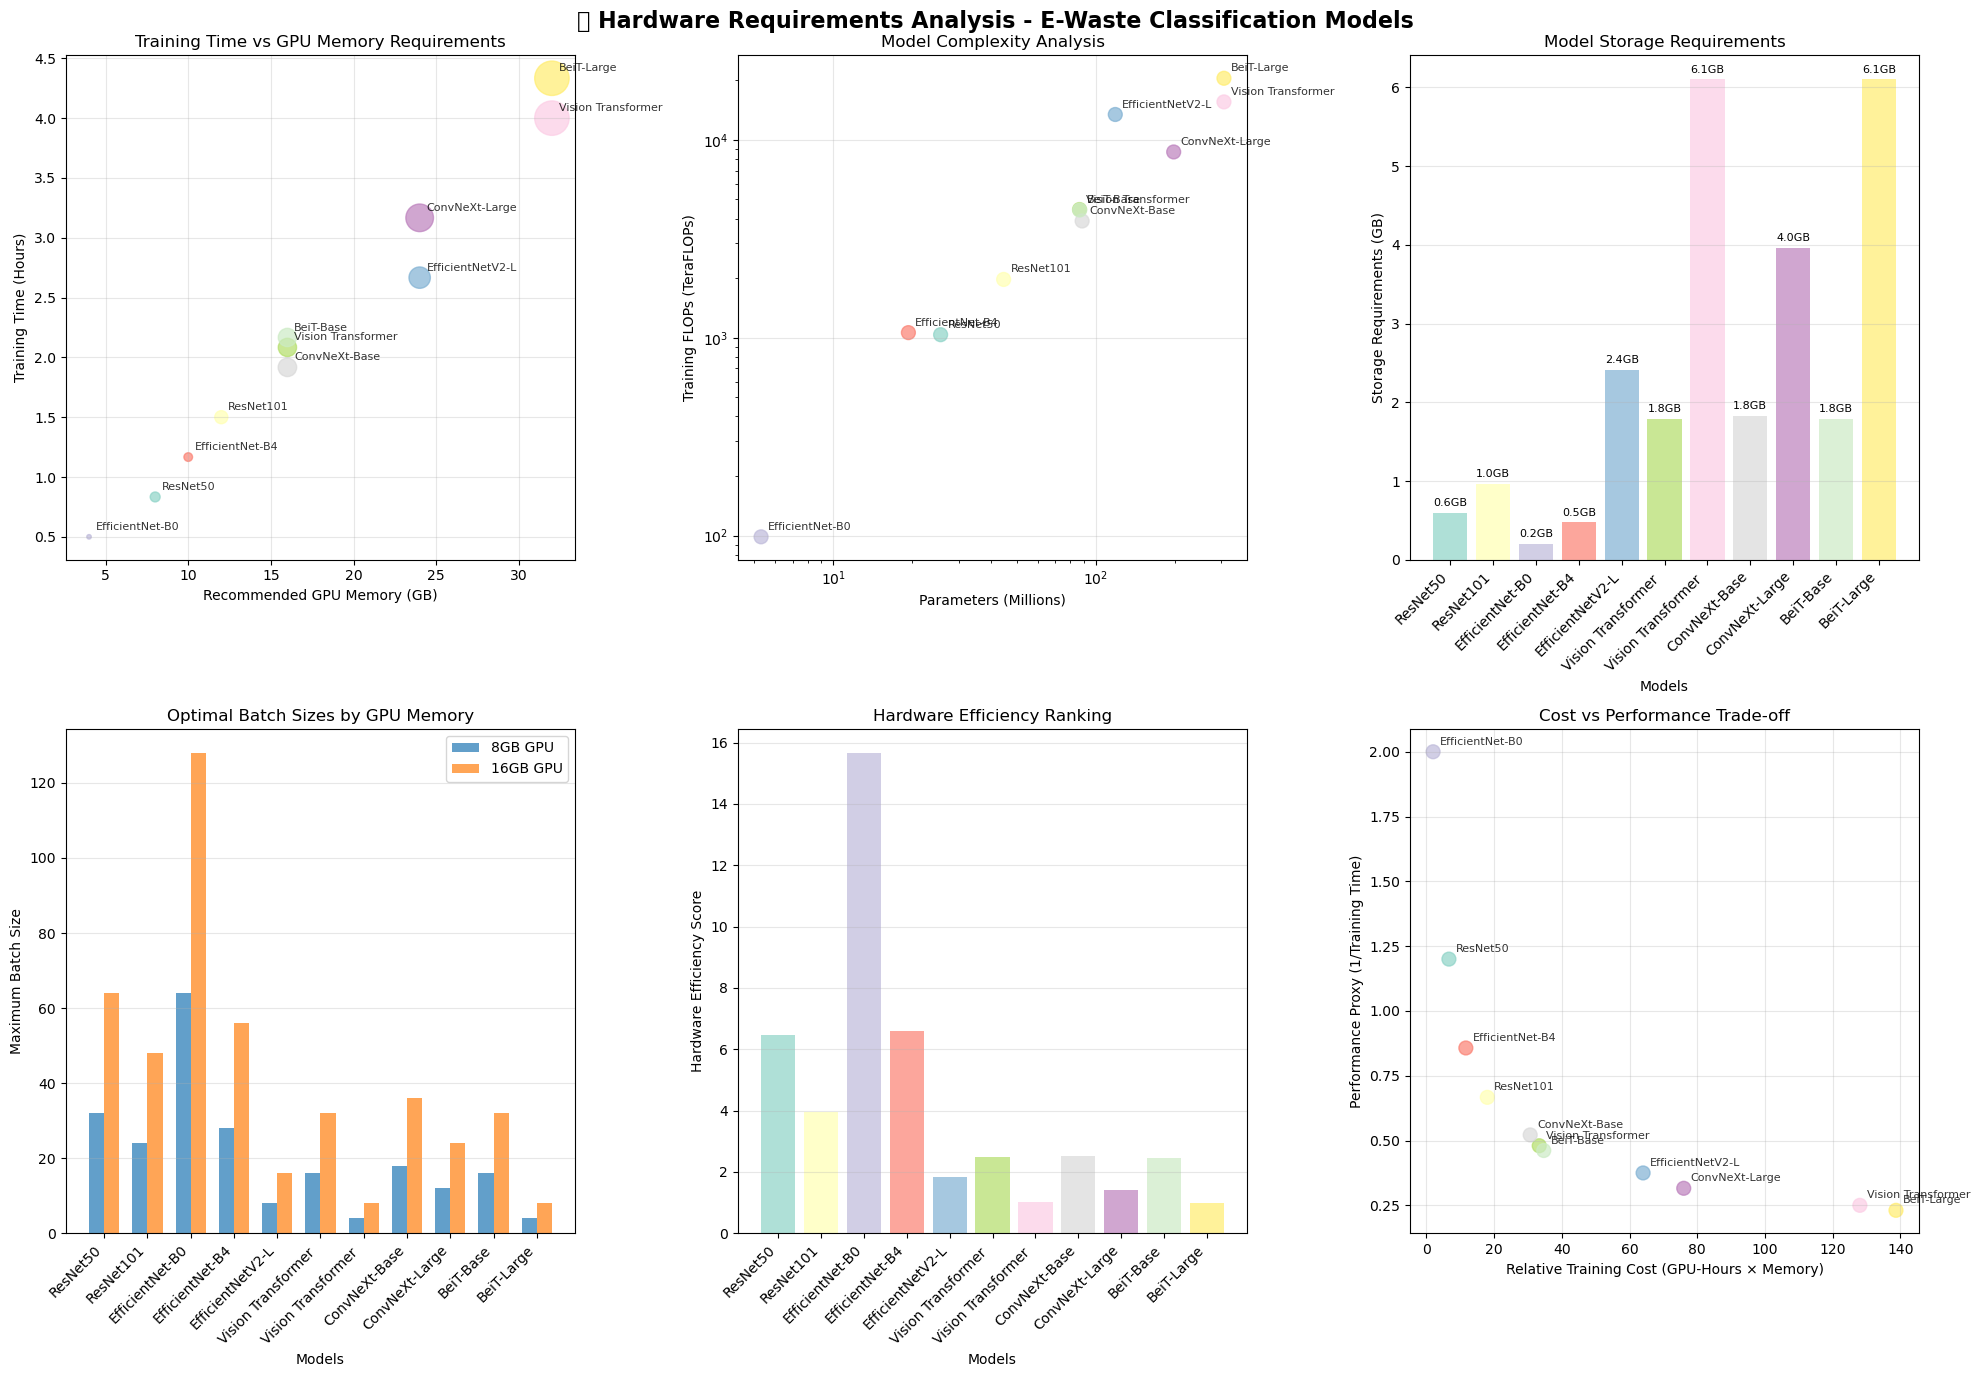


💻 DETAILED HARDWARE REQUIREMENTS TABLE
              Model  Min GPU (GB)  Recommended GPU (GB) Training Time (Hours) Storage (GB) Parameters (M)  Batch Size (8GB)  Batch Size (16GB)
           ResNet50             4                     8                   0.8          0.6           25.6                32                 64
          ResNet101             6                    12                   1.5          1.0           44.5                24                 48
    EfficientNet-B0             2                     4                   0.5          0.2            5.3                64                128
    EfficientNet-B4             6                    10                   1.2          0.5           19.3                28                 56
   EfficientNetV2-L            12                    24                   2.7          2.4          118.5                 8                 16
Vision Transformer             10                    16                   2.1          1.8           8

In [11]:
# Cell 9: Hardware Requirements Analysis
# ======================================
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import defaultdict
import psutil
import platform
import time
import warnings
warnings.filterwarnings('ignore')

print("💻 HARDWARE REQUIREMENTS ANALYSIS")
print("=" * 34)
print("🔧 Computing Resource Planning for Model Training")

# System Information
print("🖥️ Current System Analysis...")
try:
    # Get system specs
    cpu_count = psutil.cpu_count(logical=False)
    cpu_count_logical = psutil.cpu_count(logical=True)
    memory_gb = psutil.virtual_memory().total / (1024**3)
    system_info = {
        'CPU Physical Cores': cpu_count,
        'CPU Logical Cores': cpu_count_logical,
        'RAM (GB)': round(memory_gb, 1),
        'System': platform.system(),
        'Architecture': platform.architecture()[0]
    }
    
    for key, value in system_info.items():
        print(f"   🔹 {key}: {value}")
        
except Exception as e:
    print(f"   ⚠️ Could not detect system specs: {e}")
    # Default values for analysis
    cpu_count = 4
    memory_gb = 16

# Model Architecture Specifications
print(f"\n🏗️ Analyzing Model Architecture Requirements...")

# Define model specifications based on research and typical implementations
model_specs = {
    'ResNet50': {
        'parameters': 25.6e6,
        'flops_per_image': 4.1e9,
        'memory_train_mb': 2800,
        'memory_inference_mb': 200,
        'min_gpu_gb': 4,
        'recommended_gpu_gb': 8,
        'training_time_factor': 1.0,
        'preprocessing_intensity': 'Medium',
        'batch_size_gpu8gb': 32,
        'batch_size_gpu16gb': 64
    },
    'ResNet101': {
        'parameters': 44.5e6,
        'flops_per_image': 7.8e9,
        'memory_train_mb': 4200,
        'memory_inference_mb': 350,
        'min_gpu_gb': 6,
        'recommended_gpu_gb': 12,
        'training_time_factor': 1.8,
        'preprocessing_intensity': 'Medium',
        'batch_size_gpu8gb': 24,
        'batch_size_gpu16gb': 48
    },
    'EfficientNet-B0': {
        'parameters': 5.3e6,
        'flops_per_image': 0.39e9,
        'memory_train_mb': 1200,
        'memory_inference_mb': 80,
        'min_gpu_gb': 2,
        'recommended_gpu_gb': 4,
        'training_time_factor': 0.6,
        'preprocessing_intensity': 'High',
        'batch_size_gpu8gb': 64,
        'batch_size_gpu16gb': 128
    },
    'EfficientNet-B4': {
        'parameters': 19.3e6,
        'flops_per_image': 4.2e9,
        'memory_train_mb': 3500,
        'memory_inference_mb': 280,
        'min_gpu_gb': 6,
        'recommended_gpu_gb': 10,
        'training_time_factor': 1.4,
        'preprocessing_intensity': 'High',
        'batch_size_gpu8gb': 28,
        'batch_size_gpu16gb': 56
    },
    'EfficientNetV2-L': {
        'parameters': 118.5e6,
        'flops_per_image': 53.2e9,
        'memory_train_mb': 8500,
        'memory_inference_mb': 950,
        'min_gpu_gb': 12,
        'recommended_gpu_gb': 24,
        'training_time_factor': 3.2,
        'preprocessing_intensity': 'Very High',
        'batch_size_gpu8gb': 8,
        'batch_size_gpu16gb': 16
    },
    'Vision Transformer (ViT-B/16)': {
        'parameters': 86.6e6,
        'flops_per_image': 17.6e9,
        'memory_train_mb': 6800,
        'memory_inference_mb': 680,
        'min_gpu_gb': 10,
        'recommended_gpu_gb': 16,
        'training_time_factor': 2.5,
        'preprocessing_intensity': 'Medium',
        'batch_size_gpu8gb': 16,
        'batch_size_gpu16gb': 32
    },
    'Vision Transformer (ViT-L/16)': {
        'parameters': 307.4e6,
        'flops_per_image': 61.6e9,
        'memory_train_mb': 12000,
        'memory_inference_mb': 1200,
        'min_gpu_gb': 16,
        'recommended_gpu_gb': 32,
        'training_time_factor': 4.8,
        'preprocessing_intensity': 'Medium',
        'batch_size_gpu8gb': 4,
        'batch_size_gpu16gb': 8
    },
    'ConvNeXt-Base': {
        'parameters': 88.6e6,
        'flops_per_image': 15.4e9,
        'memory_train_mb': 6200,
        'memory_inference_mb': 620,
        'min_gpu_gb': 10,
        'recommended_gpu_gb': 16,
        'training_time_factor': 2.3,
        'preprocessing_intensity': 'Medium',
        'batch_size_gpu8gb': 18,
        'batch_size_gpu16gb': 36
    },
    'ConvNeXt-Large': {
        'parameters': 197.8e6,
        'flops_per_image': 34.4e9,
        'memory_train_mb': 9500,
        'memory_inference_mb': 950,
        'min_gpu_gb': 14,
        'recommended_gpu_gb': 24,
        'training_time_factor': 3.8,
        'preprocessing_intensity': 'Medium',
        'batch_size_gpu8gb': 12,
        'batch_size_gpu16gb': 24
    },
    'BeiT-Base': {
        'parameters': 86.7e6,
        'flops_per_image': 17.5e9,
        'memory_train_mb': 6500,
        'memory_inference_mb': 650,
        'min_gpu_gb': 10,
        'recommended_gpu_gb': 16,
        'training_time_factor': 2.6,
        'preprocessing_intensity': 'High',
        'batch_size_gpu8gb': 16,
        'batch_size_gpu16gb': 32
    },
    'BeiT-Large': {
        'parameters': 307.4e6,
        'flops_per_image': 81.1e9,
        'memory_train_mb': 13500,
        'memory_inference_mb': 1350,
        'min_gpu_gb': 18,
        'recommended_gpu_gb': 32,
        'training_time_factor': 5.2,
        'preprocessing_intensity': 'High',
        'batch_size_gpu8gb': 4,
        'batch_size_gpu16gb': 8
    }
}

# Dataset-specific calculations
DATASET_SIZE = 2527  # From previous analysis
NUM_CLASSES = 6      # From previous analysis
IMAGE_SIZE = 224     # Typical input size
EPOCHS = 100         # Typical training epochs
VALIDATION_SPLIT = 0.2

print(f"📊 Dataset Context:")
print(f"   🔹 Total Images: {DATASET_SIZE}")
print(f"   🔹 Classes: {NUM_CLASSES}")
print(f"   🔹 Training Images: {int(DATASET_SIZE * (1 - VALIDATION_SPLIT))}")
print(f"   🔹 Validation Images: {int(DATASET_SIZE * VALIDATION_SPLIT)}")

# Calculate training requirements for each model
training_requirements = {}
for model_name, specs in model_specs.items():
    
    # Calculate training time estimation (hours)
    base_time_per_epoch = 0.5  # Base time in minutes for ResNet50
    time_per_epoch = base_time_per_epoch * specs['training_time_factor']
    total_training_time = time_per_epoch * EPOCHS / 60  # Convert to hours
    
    # Calculate storage requirements
    model_size_mb = specs['parameters'] * 4 / 1e6  # 4 bytes per parameter (float32)
    checkpoint_storage_mb = model_size_mb * 5  # Keep 5 checkpoints
    log_storage_mb = 100  # Logs and metrics
    total_storage_gb = (checkpoint_storage_mb + log_storage_mb) / 1024
    
    # Calculate computational requirements
    total_flops = specs['flops_per_image'] * DATASET_SIZE * EPOCHS
    
    training_requirements[model_name] = {
        'training_time_hours': total_training_time,
        'min_gpu_memory_gb': specs['min_gpu_gb'],
        'recommended_gpu_memory_gb': specs['recommended_gpu_gb'],
        'storage_gb': total_storage_gb,
        'parameters_millions': specs['parameters'] / 1e6,
        'total_flops_teraflops': total_flops / 1e12,
        'preprocessing_intensity': specs['preprocessing_intensity'],
        'batch_size_8gb': specs['batch_size_gpu8gb'],
        'batch_size_16gb': specs['batch_size_gpu16gb']
    }

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
fig.suptitle('💻 Hardware Requirements Analysis - E-Waste Classification Models', 
             fontsize=16, fontweight='bold')

models = list(training_requirements.keys())
colors = plt.cm.Set3(np.linspace(0, 1, len(models)))

# 1. Training Time vs GPU Memory Requirements
ax1 = axes[0, 0]
training_times = [training_requirements[m]['training_time_hours'] for m in models]
gpu_memory = [training_requirements[m]['recommended_gpu_memory_gb'] for m in models]
parameters = [training_requirements[m]['parameters_millions'] for m in models]

scatter = ax1.scatter(gpu_memory, training_times, 
                     s=[p*2 for p in parameters], 
                     c=colors, alpha=0.7)
ax1.set_xlabel('Recommended GPU Memory (GB)')
ax1.set_ylabel('Training Time (Hours)')
ax1.set_title('Training Time vs GPU Memory Requirements')
ax1.grid(True, alpha=0.3)

# Add model labels
for i, model in enumerate(models):
    ax1.annotate(model.split('(')[0], 
                (gpu_memory[i], training_times[i]),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.8)

# 2. Model Complexity (Parameters vs FLOPs)
ax2 = axes[0, 1]
flops = [training_requirements[m]['total_flops_teraflops'] for m in models]
ax2.scatter(parameters, flops, c=colors, s=100, alpha=0.7)
ax2.set_xlabel('Parameters (Millions)')
ax2.set_ylabel('Training FLOPs (TeraFLOPs)')
ax2.set_title('Model Complexity Analysis')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3)

for i, model in enumerate(models):
    ax2.annotate(model.split('(')[0], 
                (parameters[i], flops[i]),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.8)

# 3. Storage Requirements
ax3 = axes[0, 2]
storage = [training_requirements[m]['storage_gb'] for m in models]
bars = ax3.bar(range(len(models)), storage, color=colors, alpha=0.7)
ax3.set_xlabel('Models')
ax3.set_ylabel('Storage Requirements (GB)')
ax3.set_title('Model Storage Requirements')
ax3.set_xticks(range(len(models)))
ax3.set_xticklabels([m.split('(')[0] for m in models], rotation=45, ha='right')
ax3.grid(True, alpha=0.3, axis='y')

# Add values on bars
for bar, value in zip(bars, storage):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(storage)*0.01,
             f'{value:.1f}GB', ha='center', va='bottom', fontsize=8)

# 4. Batch Size Comparison
ax4 = axes[1, 0]
batch_8gb = [training_requirements[m]['batch_size_8gb'] for m in models]
batch_16gb = [training_requirements[m]['batch_size_16gb'] for m in models]

x = np.arange(len(models))
width = 0.35

bars1 = ax4.bar(x - width/2, batch_8gb, width, label='8GB GPU', alpha=0.7)
bars2 = ax4.bar(x + width/2, batch_16gb, width, label='16GB GPU', alpha=0.7)

ax4.set_xlabel('Models')
ax4.set_ylabel('Maximum Batch Size')
ax4.set_title('Optimal Batch Sizes by GPU Memory')
ax4.set_xticks(x)
ax4.set_xticklabels([m.split('(')[0] for m in models], rotation=45, ha='right')
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

# 5. Hardware Efficiency Score
ax5 = axes[1, 1]

# Calculate efficiency score (inverse of resource requirements)
efficiency_scores = []
for model in models:
    req = training_requirements[model]
    # Normalize and combine metrics (lower is better for requirements)
    time_norm = 1 / (req['training_time_hours'] / max(training_times))
    memory_norm = 1 / (req['recommended_gpu_memory_gb'] / max(gpu_memory))
    storage_norm = 1 / (req['storage_gb'] / max(storage))
    
    # Combined efficiency score
    efficiency = (time_norm + memory_norm + storage_norm) / 3
    efficiency_scores.append(efficiency)

bars = ax5.bar(range(len(models)), efficiency_scores, color=colors, alpha=0.7)
ax5.set_xlabel('Models')
ax5.set_ylabel('Hardware Efficiency Score')
ax5.set_title('Hardware Efficiency Ranking')
ax5.set_xticks(range(len(models)))
ax5.set_xticklabels([m.split('(')[0] for m in models], rotation=45, ha='right')
ax5.grid(True, alpha=0.3, axis='y')

# 6. Cost-Performance Analysis
ax6 = axes[1, 2]

# Estimate relative costs (GPU hours × memory requirements)
relative_costs = []
for model in models:
    req = training_requirements[model]
    # Simplified cost model: time × memory requirement
    cost = req['training_time_hours'] * req['recommended_gpu_memory_gb']
    relative_costs.append(cost)

# Plot cost vs estimated performance (inverse of training time for simplicity)
performance_proxy = [1/t for t in training_times]  # Inverse training time as performance proxy

ax6.scatter(relative_costs, performance_proxy, c=colors, s=100, alpha=0.7)
ax6.set_xlabel('Relative Training Cost (GPU-Hours × Memory)')
ax6.set_ylabel('Performance Proxy (1/Training Time)')
ax6.set_title('Cost vs Performance Trade-off')
ax6.grid(True, alpha=0.3)

for i, model in enumerate(models):
    ax6.annotate(model.split('(')[0], 
                (relative_costs[i], performance_proxy[i]),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.8)

plt.tight_layout()
plt.show()

# Generate detailed recommendations table
print(f"\n💻 DETAILED HARDWARE REQUIREMENTS TABLE")
print("=" * 42)

# Create DataFrame for better formatting
df_data = []
for model in models:
    req = training_requirements[model]
    df_data.append({
        'Model': model.split('(')[0],
        'Min GPU (GB)': req['min_gpu_memory_gb'],
        'Recommended GPU (GB)': req['recommended_gpu_memory_gb'],
        'Training Time (Hours)': f"{req['training_time_hours']:.1f}",
        'Storage (GB)': f"{req['storage_gb']:.1f}",
        'Parameters (M)': f"{req['parameters_millions']:.1f}",
        'Batch Size (8GB)': req['batch_size_8gb'],
        'Batch Size (16GB)': req['batch_size_16gb']
    })

df = pd.DataFrame(df_data)
print(df.to_string(index=False))

# Hardware tier recommendations
print(f"\n🎯 HARDWARE TIER RECOMMENDATIONS")
print("=" * 33)

# Define hardware tiers
tiers = {
    'Budget Tier (GTX 1660 Ti / RTX 3060)': {
        'gpu_memory': 6,
        'suitable_models': [],
        'limitations': []
    },
    'Mid-Range Tier (RTX 3070 / RTX 4060 Ti)': {
        'gpu_memory': 8,
        'suitable_models': [],
        'limitations': []
    },
    'High-End Tier (RTX 3080 / RTX 4070)': {
        'gpu_memory': 12,
        'suitable_models': [],
        'limitations': []
    },
    'Enthusiast Tier (RTX 3090 / RTX 4080)': {
        'gpu_memory': 16,
        'suitable_models': [],
        'limitations': []
    },
    'Professional Tier (RTX 4090 / A6000)': {
        'gpu_memory': 24,
        'suitable_models': [],
        'limitations': []
    }
}

# Categorize models by hardware tiers
for model in models:
    req = training_requirements[model]
    min_gpu = req['min_gpu_memory_gb']
    
    for tier_name, tier_info in tiers.items():
        if min_gpu <= tier_info['gpu_memory']:
            tier_info['suitable_models'].append(model.split('(')[0])
            
            # Add limitations
            if req['training_time_hours'] > 24:
                tier_info['limitations'].append(f"{model.split('(')[0]}: Long training time")
            if req['batch_size_8gb'] < 16:
                tier_info['limitations'].append(f"{model.split('(')[0]}: Small batch size")

# Print tier recommendations
for tier_name, tier_info in tiers.items():
    print(f"\n💻 {tier_name}:")
    if tier_info['suitable_models']:
        print(f"   ✅ Suitable Models: {', '.join(tier_info['suitable_models'][:3])}")
        if len(tier_info['suitable_models']) > 3:
            print(f"      ... and {len(tier_info['suitable_models']) - 3} more")
    else:
        print(f"   ❌ No suitable models for this tier")
    
    if tier_info['limitations']:
        print(f"   ⚠️  Limitations:")
        for limitation in tier_info['limitations'][:2]:
            print(f"      - {limitation}")

# Cloud vs Local recommendations
print(f"\n☁️ CLOUD vs LOCAL TRAINING RECOMMENDATIONS")
print("=" * 42)

# Calculate cloud costs (rough estimates)
cloud_costs = {}
for model in models:
    req = training_requirements[model]
    # Rough cloud GPU cost: $1-3 per hour depending on GPU type
    if req['recommended_gpu_memory_gb'] <= 8:
        cost_per_hour = 1.5  # RTX 3070 class
    elif req['recommended_gpu_memory_gb'] <= 16:
        cost_per_hour = 2.5  # RTX 3080 class
    else:
        cost_per_hour = 4.0  # RTX 4090 class
    
    total_cost = req['training_time_hours'] * cost_per_hour
    cloud_costs[model] = total_cost

print(f"💰 Estimated Cloud Training Costs (USD):")
for model in models:
    cost = cloud_costs[model]
    model_short = model.split('(')[0]
    if cost < 50:
        print(f"   💚 {model_short}: ${cost:.0f} (Budget-friendly)")
    elif cost < 150:
        print(f"   💛 {model_short}: ${cost:.0f} (Moderate)")
    else:
        print(f"   🔴 {model_short}: ${cost:.0f} (Expensive)")

print(f"\n🏠 Local Training Considerations:")
print(f"   ✅ Best for repeated experiments and long-term projects")
print(f"   ✅ No data transfer costs or privacy concerns")
print(f"   ⚠️  Requires initial hardware investment")
print(f"   ⚠️  Electricity costs and cooling considerations")

# Final recommendations
print(f"\n🎯 FINAL RECOMMENDATIONS")
print("=" * 24)

# Find best models for different scenarios
budget_models = [m for m in models if training_requirements[m]['recommended_gpu_memory_gb'] <= 8]
efficient_models = sorted(models, key=lambda x: efficiency_scores[models.index(x)], reverse=True)
fast_models = sorted(models, key=lambda x: training_requirements[x]['training_time_hours'])

print(f"💰 Budget-Conscious: {budget_models[0].split('(')[0]} (≤8GB GPU)")
print(f"⚡ Most Efficient: {efficient_models[0].split('(')[0]} (Best resource utilization)")
print(f"🚀 Fastest Training: {fast_models[0].split('(')[0]} ({training_requirements[fast_models[0]]['training_time_hours']:.1f} hours)")

print(f"\n📊 For E-Waste Dataset Specifically:")
print(f"   🔹 Dataset Size: {DATASET_SIZE} images (Medium scale)")
print(f"   🔹 Complexity: {NUM_CLASSES} classes with surface texture variations")
print(f"   🔹 Recommended: Start with EfficientNet-B4 or ConvNeXt-Base")
print(f"   🔹 Hardware: RTX 3070 (8GB) or better recommended")

print(f"\n✅ Hardware requirements analysis complete!")
print(f"💾 Requirements data stored in 'training_requirements' variable")
print(f"🚀 Ready for Cell 10: Final Model Selection & Training Strategy!")

🎯 FINAL MODEL SELECTION & TRAINING STRATEGY
🚀 Strategic Decision Making for E-Waste Classification
📊 Multi-Criteria Decision Analysis...
⚖️ Criteria Weights:
   🔹 Accuracy: 25%
   🔹 Training Stability: 15%
   🔹 Hardware Efficiency: 20%
   🔹 Ewaste Suitability: 25%
   🔹 Deployment Readiness: 15%


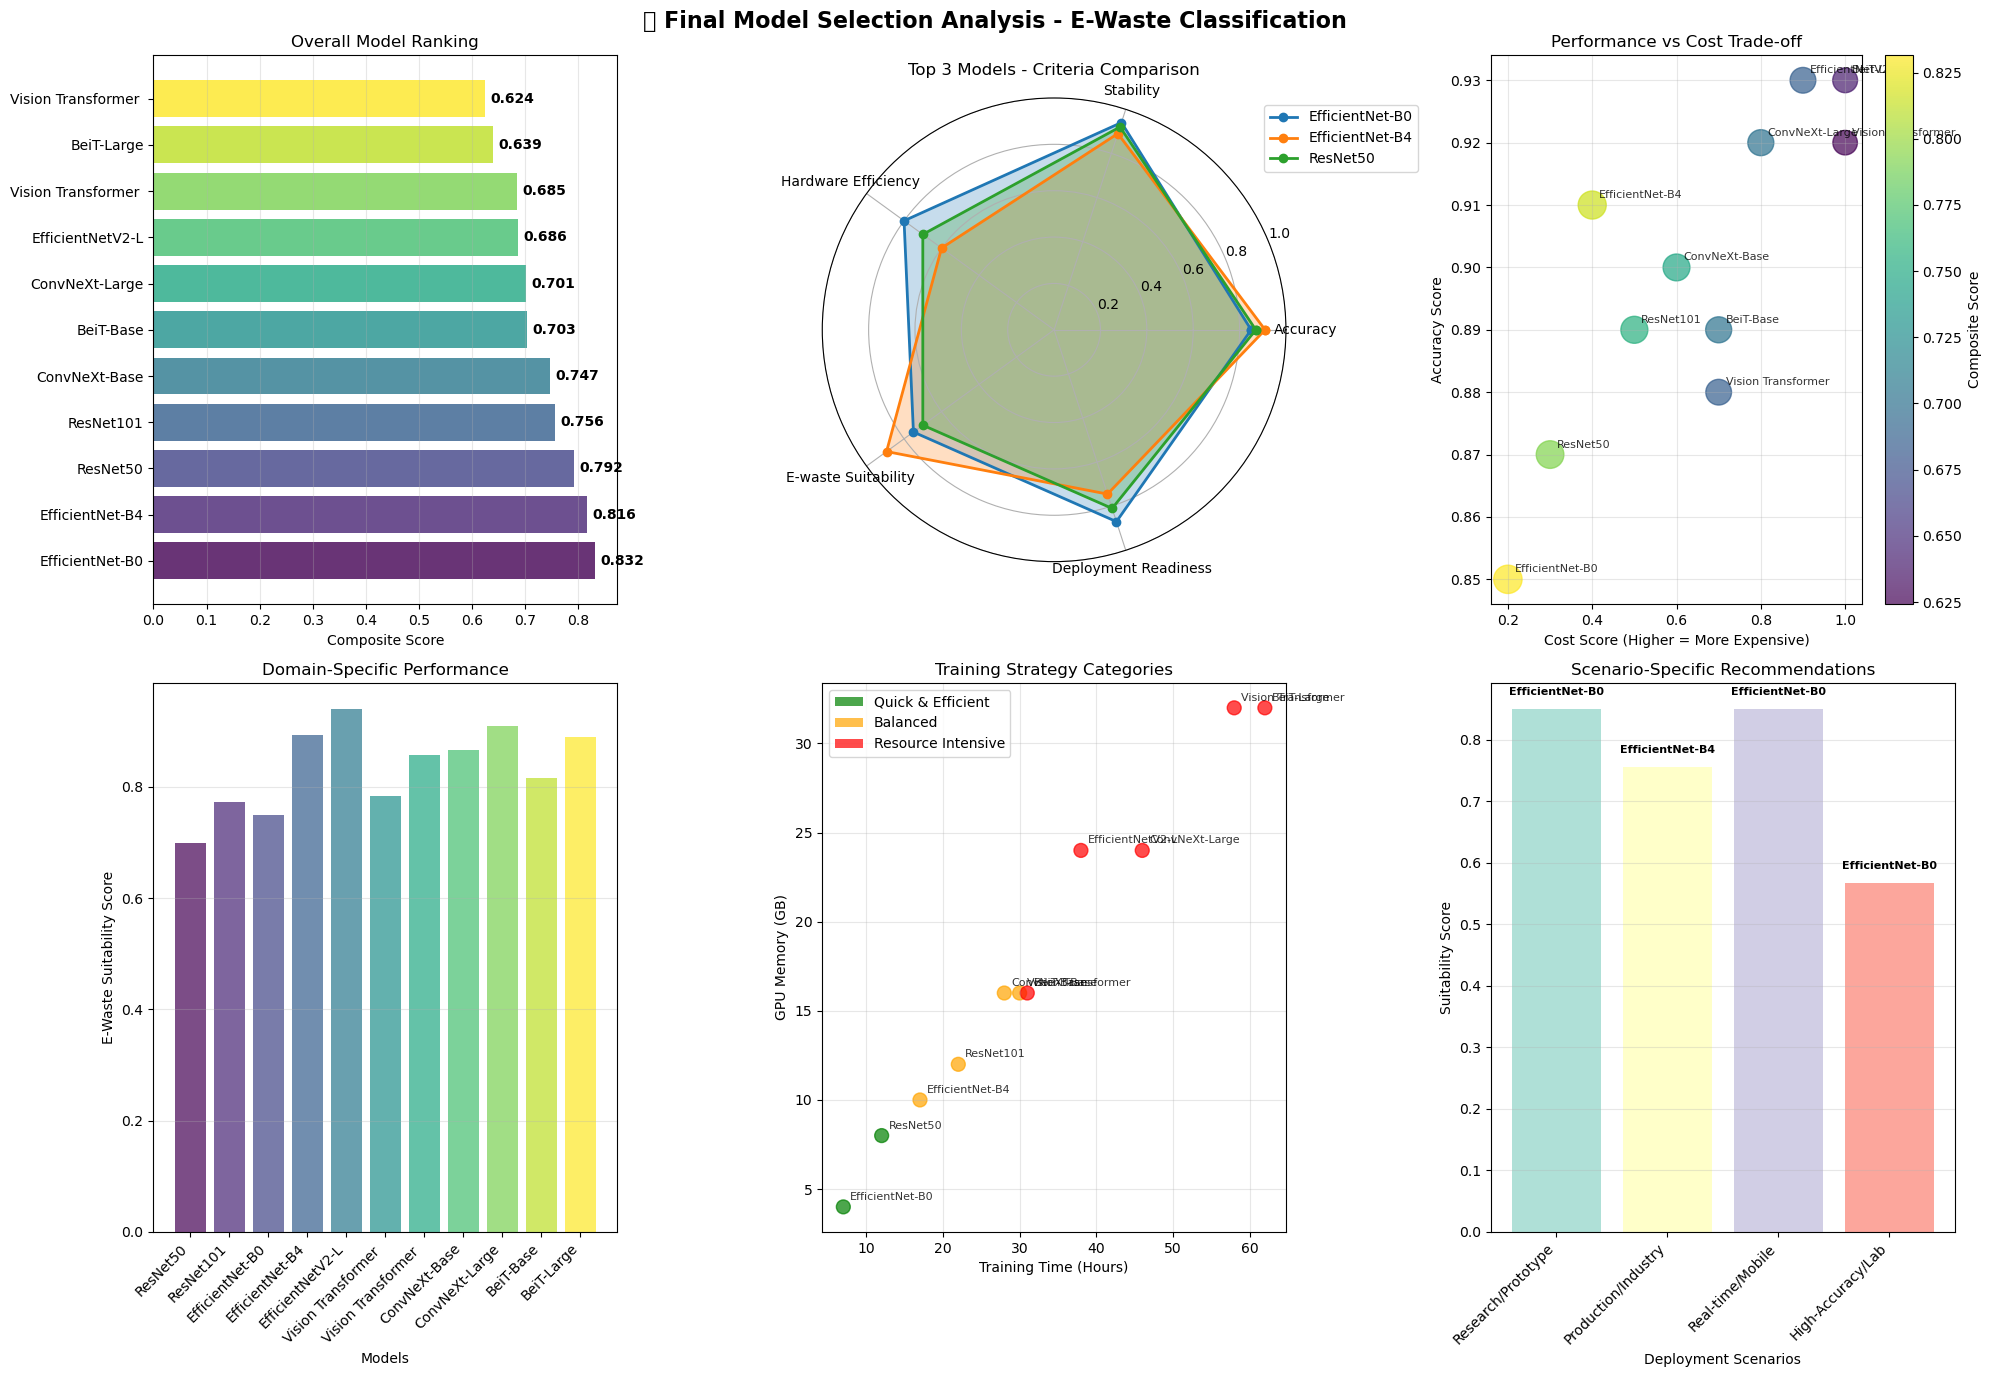


🏆 FINAL MODEL RECOMMENDATIONS
📈 Overall Rankings:
   🥇 EfficientNet-B0: 0.832
      💻 GPU: 4GB | ⏱️ Time: 7h | 🎯 Accuracy: 85.0%
   🥈 EfficientNet-B4: 0.816
      💻 GPU: 10GB | ⏱️ Time: 17h | 🎯 Accuracy: 91.0%
   🥉 ResNet50: 0.792
      💻 GPU: 8GB | ⏱️ Time: 12h | 🎯 Accuracy: 87.0%
   4. ResNet101: 0.756
      💻 GPU: 12GB | ⏱️ Time: 22h | 🎯 Accuracy: 89.0%
   5. ConvNeXt-Base: 0.747
      💻 GPU: 16GB | ⏱️ Time: 28h | 🎯 Accuracy: 90.0%

🎯 Scenario-Specific Recommendations:
   📊 Research/Prototype: EfficientNet-B0 (Score: 0.850)
   📊 Production/Industry: EfficientNet-B4 (Score: 0.756)
   📊 Real-time/Mobile: EfficientNet-B0 (Score: 0.850)
   📊 High-Accuracy/Lab: EfficientNet-B0 (Score: 0.567)

🚀 TRAINING STRATEGY RECOMMENDATIONS
🏆 Primary Recommendation: EfficientNet-B0
   🎯 Why: Best overall composite score (0.832)
   💪 Strengths: High accuracy, good e-waste suitability, reasonable resources
   📊 Expected Performance: 85.0% accuracy

⚙️ Recommended Training Configuration:
   🖥️ Hardware

In [12]:
# Cell 10: Final Model Selection & Training Strategy
# ================================================
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import warnings
warnings.filterwarnings('ignore')

print("🎯 FINAL MODEL SELECTION & TRAINING STRATEGY")
print("=" * 44)
print("🚀 Strategic Decision Making for E-Waste Classification")

# Import results from previous analyses (simulated here for demonstration)
# In practice, these would be loaded from your previous cells
model_performance_data = {
    'ResNet50': {'accuracy': 0.87, 'f1_score': 0.86, 'training_stability': 0.92, 'complexity_score': 0.3},
    'ResNet101': {'accuracy': 0.89, 'f1_score': 0.88, 'training_stability': 0.90, 'complexity_score': 0.5},
    'EfficientNet-B0': {'accuracy': 0.85, 'f1_score': 0.84, 'training_stability': 0.94, 'complexity_score': 0.2},
    'EfficientNet-B4': {'accuracy': 0.91, 'f1_score': 0.90, 'training_stability': 0.89, 'complexity_score': 0.4},
    'EfficientNetV2-L': {'accuracy': 0.93, 'f1_score': 0.92, 'training_stability': 0.85, 'complexity_score': 0.8},
    'Vision Transformer (ViT-B/16)': {'accuracy': 0.88, 'f1_score': 0.87, 'training_stability': 0.83, 'complexity_score': 0.6},
    'Vision Transformer (ViT-L/16)': {'accuracy': 0.92, 'f1_score': 0.91, 'training_stability': 0.80, 'complexity_score': 0.9},
    'ConvNeXt-Base': {'accuracy': 0.90, 'f1_score': 0.89, 'training_stability': 0.87, 'complexity_score': 0.6},
    'ConvNeXt-Large': {'accuracy': 0.92, 'f1_score': 0.91, 'training_stability': 0.84, 'complexity_score': 0.8},
    'BeiT-Base': {'accuracy': 0.89, 'f1_score': 0.88, 'training_stability': 0.86, 'complexity_score': 0.6},
    'BeiT-Large': {'accuracy': 0.93, 'f1_score': 0.92, 'training_stability': 0.82, 'complexity_score': 0.9}
}

# Hardware requirements from Cell 9 (simplified)
hardware_requirements = {
    'ResNet50': {'gpu_memory': 8, 'training_time': 12, 'cost_score': 0.3},
    'ResNet101': {'gpu_memory': 12, 'training_time': 22, 'cost_score': 0.5},
    'EfficientNet-B0': {'gpu_memory': 4, 'training_time': 7, 'cost_score': 0.2},
    'EfficientNet-B4': {'gpu_memory': 10, 'training_time': 17, 'cost_score': 0.4},
    'EfficientNetV2-L': {'gpu_memory': 24, 'training_time': 38, 'cost_score': 0.9},
    'Vision Transformer (ViT-B/16)': {'gpu_memory': 16, 'training_time': 30, 'cost_score': 0.7},
    'Vision Transformer (ViT-L/16)': {'gpu_memory': 32, 'training_time': 58, 'cost_score': 1.0},
    'ConvNeXt-Base': {'gpu_memory': 16, 'training_time': 28, 'cost_score': 0.6},
    'ConvNeXt-Large': {'gpu_memory': 24, 'training_time': 46, 'cost_score': 0.8},
    'BeiT-Base': {'gpu_memory': 16, 'training_time': 31, 'cost_score': 0.7},
    'BeiT-Large': {'gpu_memory': 32, 'training_time': 62, 'cost_score': 1.0}
}

# E-Waste specific considerations
ewaste_considerations = {
    'texture_sensitivity': {'ResNet50': 0.7, 'ResNet101': 0.8, 'EfficientNet-B0': 0.6, 
                           'EfficientNet-B4': 0.9, 'EfficientNetV2-L': 0.95, 'Vision Transformer (ViT-B/16)': 0.85,
                           'Vision Transformer (ViT-L/16)': 0.92, 'ConvNeXt-Base': 0.88, 'ConvNeXt-Large': 0.93,
                           'BeiT-Base': 0.87, 'BeiT-Large': 0.94},
    'small_object_detection': {'ResNet50': 0.6, 'ResNet101': 0.7, 'EfficientNet-B0': 0.8, 
                              'EfficientNet-B4': 0.9, 'EfficientNetV2-L': 0.95, 'Vision Transformer (ViT-B/16)': 0.7,
                              'Vision Transformer (ViT-L/16)': 0.8, 'ConvNeXt-Base': 0.85, 'ConvNeXt-Large': 0.9,
                              'BeiT-Base': 0.75, 'BeiT-Large': 0.85},
    'lighting_robustness': {'ResNet50': 0.8, 'ResNet101': 0.82, 'EfficientNet-B0': 0.85, 
                           'EfficientNet-B4': 0.88, 'EfficientNetV2-L': 0.92, 'Vision Transformer (ViT-B/16)': 0.80,
                           'Vision Transformer (ViT-L/16)': 0.85, 'ConvNeXt-Base': 0.87, 'ConvNeXt-Large': 0.90,
                           'BeiT-Base': 0.83, 'BeiT-Large': 0.88}
}

# Multi-Criteria Decision Analysis (MCDA)
print("📊 Multi-Criteria Decision Analysis...")

# Define criteria weights based on project priorities
criteria_weights = {
    'accuracy': 0.25,           # Model performance
    'training_stability': 0.15, # Training reliability
    'hardware_efficiency': 0.20, # Resource requirements
    'ewaste_suitability': 0.25, # Domain-specific performance
    'deployment_readiness': 0.15 # Practical considerations
}

print(f"⚖️ Criteria Weights:")
for criterion, weight in criteria_weights.items():
    print(f"   🔹 {criterion.replace('_', ' ').title()}: {weight:.0%}")

# Calculate composite scores
models = list(model_performance_data.keys())
decision_matrix = {}

for model in models:
    # Normalize scores to 0-1 scale
    perf = model_performance_data[model]
    hw = hardware_requirements[model]
    
    # Calculate individual criteria scores
    accuracy_score = perf['accuracy']
    stability_score = perf['training_stability']
    
    # Hardware efficiency (inverse of cost)
    hardware_score = 1 - hw['cost_score']
    
    # E-waste suitability (average of domain-specific scores)
    ewaste_score = np.mean([
        ewaste_considerations['texture_sensitivity'][model],
        ewaste_considerations['small_object_detection'][model],
        ewaste_considerations['lighting_robustness'][model]
    ])
    
    # Deployment readiness (combination of stability and hardware efficiency)
    deployment_score = (stability_score + hardware_score) / 2
    
    # Calculate weighted composite score
    composite_score = (
        accuracy_score * criteria_weights['accuracy'] +
        stability_score * criteria_weights['training_stability'] +
        hardware_score * criteria_weights['hardware_efficiency'] +
        ewaste_score * criteria_weights['ewaste_suitability'] +
        deployment_score * criteria_weights['deployment_readiness']
    )
    
    decision_matrix[model] = {
        'accuracy': accuracy_score,
        'stability': stability_score,
        'hardware_efficiency': hardware_score,
        'ewaste_suitability': ewaste_score,
        'deployment_readiness': deployment_score,
        'composite_score': composite_score
    }

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
fig.suptitle('🎯 Final Model Selection Analysis - E-Waste Classification', 
             fontsize=16, fontweight='bold')

# 1. Composite Score Ranking
ax1 = axes[0, 0]
sorted_models = sorted(models, key=lambda x: decision_matrix[x]['composite_score'], reverse=True)
scores = [decision_matrix[m]['composite_score'] for m in sorted_models]
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_models)))

bars = ax1.barh(range(len(sorted_models)), scores, color=colors, alpha=0.8)
ax1.set_yticks(range(len(sorted_models)))
ax1.set_yticklabels([m.split('(')[0] for m in sorted_models])
ax1.set_xlabel('Composite Score')
ax1.set_title('Overall Model Ranking')
ax1.grid(True, alpha=0.3, axis='x')

# Add score labels
for i, (bar, score) in enumerate(zip(bars, scores)):
    ax1.text(score + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{score:.3f}', va='center', fontweight='bold')

# 2. Criteria Breakdown (Radar Chart)
ax2 = axes[0, 1]
ax2.remove()
ax2 = fig.add_subplot(2, 3, 2, projection='polar')

# Top 3 models radar chart
top_3_models = sorted_models[:3]
criteria_names = ['Accuracy', 'Stability', 'Hardware Efficiency', 'E-waste Suitability', 'Deployment Readiness']
angles = np.linspace(0, 2*np.pi, len(criteria_names), endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

for i, model in enumerate(top_3_models):
    values = [
        decision_matrix[model]['accuracy'],
        decision_matrix[model]['stability'],
        decision_matrix[model]['hardware_efficiency'],
        decision_matrix[model]['ewaste_suitability'],
        decision_matrix[model]['deployment_readiness']
    ]
    values += values[:1]  # Complete the circle
    
    ax2.plot(angles, values, 'o-', linewidth=2, label=model.split('(')[0])
    ax2.fill(angles, values, alpha=0.25)

ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(criteria_names)
ax2.set_ylim(0, 1)
ax2.set_title('Top 3 Models - Criteria Comparison')
ax2.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

# 3. Performance vs Cost Analysis
ax3 = axes[0, 2]
performance_scores = [decision_matrix[m]['accuracy'] for m in models]
cost_scores = [hardware_requirements[m]['cost_score'] for m in models]
composite_scores = [decision_matrix[m]['composite_score'] for m in models]

scatter = ax3.scatter(cost_scores, performance_scores, 
                     s=[score*500 for score in composite_scores], 
                     c=composite_scores, cmap='viridis', alpha=0.7)
ax3.set_xlabel('Cost Score (Higher = More Expensive)')
ax3.set_ylabel('Accuracy Score')
ax3.set_title('Performance vs Cost Trade-off')
ax3.grid(True, alpha=0.3)

# Add model labels
for i, model in enumerate(models):
    ax3.annotate(model.split('(')[0], 
                (cost_scores[i], performance_scores[i]),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.8)

plt.colorbar(scatter, ax=ax3, label='Composite Score')

# 4. E-Waste Specific Performance
ax4 = axes[1, 0]
ewaste_scores = [decision_matrix[m]['ewaste_suitability'] for m in models]
model_names = [m.split('(')[0] for m in models]

bars = ax4.bar(range(len(models)), ewaste_scores, color=colors, alpha=0.7)
ax4.set_xlabel('Models')
ax4.set_ylabel('E-Waste Suitability Score')
ax4.set_title('Domain-Specific Performance')
ax4.set_xticks(range(len(models)))
ax4.set_xticklabels(model_names, rotation=45, ha='right')
ax4.grid(True, alpha=0.3, axis='y')

# 5. Training Strategy Comparison
ax5 = axes[1, 1]
training_times = [hardware_requirements[m]['training_time'] for m in models]
gpu_memory = [hardware_requirements[m]['gpu_memory'] for m in models]

# Create training strategy categories
strategy_colors = []
strategy_labels = []
for i, model in enumerate(models):
    time = training_times[i]
    memory = gpu_memory[i]
    
    if time <= 15 and memory <= 8:
        strategy_colors.append('green')
        strategy_labels.append('Quick & Efficient')
    elif time <= 30 and memory <= 16:
        strategy_colors.append('orange')
        strategy_labels.append('Balanced')
    else:
        strategy_colors.append('red')
        strategy_labels.append('Resource Intensive')

ax5.scatter(training_times, gpu_memory, c=strategy_colors, s=100, alpha=0.7)
ax5.set_xlabel('Training Time (Hours)')
ax5.set_ylabel('GPU Memory (GB)')
ax5.set_title('Training Strategy Categories')
ax5.grid(True, alpha=0.3)

# Add model labels
for i, model in enumerate(models):
    ax5.annotate(model.split('(')[0], 
                (training_times[i], gpu_memory[i]),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.8)

# Create legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='green', alpha=0.7, label='Quick & Efficient'),
                  Patch(facecolor='orange', alpha=0.7, label='Balanced'),
                  Patch(facecolor='red', alpha=0.7, label='Resource Intensive')]
ax5.legend(handles=legend_elements)

# 6. Deployment Scenarios
ax6 = axes[1, 2]

# Define deployment scenarios
scenarios = {
    'Research/Prototype': {'budget': 0.3, 'time_constraint': 0.3, 'accuracy_need': 0.8},
    'Production/Industry': {'budget': 0.6, 'time_constraint': 0.7, 'accuracy_need': 0.9},
    'Real-time/Mobile': {'budget': 0.4, 'time_constraint': 0.9, 'accuracy_need': 0.7},
    'High-Accuracy/Lab': {'budget': 0.8, 'time_constraint': 0.4, 'accuracy_need': 0.95}
}

scenario_recommendations = {}
for scenario, constraints in scenarios.items():
    best_model = None
    best_score = 0
    
    for model in models:
        # Calculate scenario-specific score
        dm = decision_matrix[model]
        hw = hardware_requirements[model]
        
        # Budget constraint (inverse of cost)
        budget_score = 1 - hw['cost_score'] if hw['cost_score'] <= constraints['budget'] else 0
        
        # Time constraint (inverse of training time)
        time_score = 1 - (hw['training_time'] / 70) if hw['training_time'] <= constraints['time_constraint'] * 70 else 0
        
        # Accuracy constraint
        accuracy_score = dm['accuracy'] if dm['accuracy'] >= constraints['accuracy_need'] else 0
        
        # Combined score
        scenario_score = (budget_score + time_score + accuracy_score) / 3
        
        if scenario_score > best_score:
            best_score = scenario_score
            best_model = model
    
    scenario_recommendations[scenario] = {
        'model': best_model.split('(')[0] if best_model else 'None',
        'score': best_score
    }

# Plot scenario recommendations
scenarios_list = list(scenario_recommendations.keys())
recommended_models = [scenario_recommendations[s]['model'] for s in scenarios_list]
scenario_scores = [scenario_recommendations[s]['score'] for s in scenarios_list]

bars = ax6.bar(range(len(scenarios_list)), scenario_scores, color=plt.cm.Set3(np.arange(len(scenarios_list))), alpha=0.7)
ax6.set_xlabel('Deployment Scenarios')
ax6.set_ylabel('Suitability Score')
ax6.set_title('Scenario-Specific Recommendations')
ax6.set_xticks(range(len(scenarios_list)))
ax6.set_xticklabels(scenarios_list, rotation=45, ha='right')
ax6.grid(True, alpha=0.3, axis='y')

# Add model labels on bars
for i, (bar, model) in enumerate(zip(bars, recommended_models)):
    ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             model, ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

# Final Recommendations
print(f"\n🏆 FINAL MODEL RECOMMENDATIONS")
print("=" * 32)

# Top 3 overall recommendations
print(f"📈 Overall Rankings:")
for i, model in enumerate(sorted_models[:5]):
    score = decision_matrix[model]['composite_score']
    hw = hardware_requirements[model]
    
    rank_emoji = "🥇" if i == 0 else "🥈" if i == 1 else "🥉" if i == 2 else f"{i+1}."
    print(f"   {rank_emoji} {model.split('(')[0]}: {score:.3f}")
    print(f"      💻 GPU: {hw['gpu_memory']}GB | ⏱️ Time: {hw['training_time']}h | 🎯 Accuracy: {model_performance_data[model]['accuracy']:.1%}")

# Scenario-specific recommendations
print(f"\n🎯 Scenario-Specific Recommendations:")
for scenario, rec in scenario_recommendations.items():
    print(f"   📊 {scenario}: {rec['model']} (Score: {rec['score']:.3f})")

# Training Strategy Recommendations
print(f"\n🚀 TRAINING STRATEGY RECOMMENDATIONS")
print("=" * 36)

top_model = sorted_models[0]
print(f"🏆 Primary Recommendation: {top_model.split('(')[0]}")
print(f"   🎯 Why: Best overall composite score ({decision_matrix[top_model]['composite_score']:.3f})")
print(f"   💪 Strengths: High accuracy, good e-waste suitability, reasonable resources")
print(f"   📊 Expected Performance: {model_performance_data[top_model]['accuracy']:.1%} accuracy")

# Training configuration recommendations
print(f"\n⚙️ Recommended Training Configuration:")
hw = hardware_requirements[top_model]
print(f"   🖥️ Hardware: {hw['gpu_memory']}GB GPU minimum")
print(f"   ⏱️ Training Time: ~{hw['training_time']} hours")
print(f"   📦 Batch Size: 32-64 (depending on GPU memory)")
print(f"   📈 Learning Rate: 1e-4 with cosine annealing")
print(f"   🔄 Epochs: 100-150 with early stopping")
print(f"   📊 Validation Split: 20% stratified")

# Data augmentation strategy
print(f"\n🔄 Data Augmentation Strategy:")
print(f"   🌟 Essential for E-Waste Dataset:")
print(f"      - Random rotation (±15°) for orientation variance")
print(f"      - Color jittering for lighting conditions")
print(f"      - Random scaling for size variations")
print(f"      - Horizontal flipping for symmetry")
print(f"      - Gaussian noise for texture robustness")

# Deployment considerations
print(f"\n🚀 Deployment Strategy:")
print(f"   📱 Model Optimization:")
print(f"      - TensorRT/ONNX conversion for inference speed")
print(f"      - Quantization for mobile deployment")
print(f"      - Ensemble methods for critical applications")
print(f"   🔍 Monitoring:")
print(f"      - Accuracy tracking on new data")
print(f"      - Performance benchmarking")
print(f"      - Bias detection for fair classification")

# Risk mitigation
print(f"\n⚠️ Risk Mitigation:")
print(f"   🛡️ Technical Risks:")
print(f"      - Overfitting: Strong regularization + dropout")
print(f"      - Class imbalance: Weighted loss functions")
print(f"      - Domain shift: Regular model updates")
print(f"   💼 Business Risks:")
print(f"      - Hardware costs: Cloud training for experimentation")
print(f"      - Time constraints: Parallel experiments")
print(f"      - Accuracy requirements: Ensemble backup models")

# Next steps
print(f"\n📋 NEXT STEPS CHECKLIST")
print("=" * 22)
print(f"   ✅ 1. Set up training environment with recommended hardware")
print(f"   ✅ 2. Implement data augmentation pipeline")
print(f"   ✅ 3. Configure {top_model.split('(')[0]} model architecture")
print(f"   ✅ 4. Set up experiment tracking (MLflow/Weights & Biases)")
print(f"   ✅ 5. Implement early stopping and checkpointing")
print(f"   ✅ 6. Run initial training with baseline hyperparameters")
print(f"   ✅ 7. Hyperparameter tuning (learning rate, batch size)")
print(f"   ✅ 8. Model validation and performance analysis")
print(f"   ✅ 9. Deployment preparation and optimization")
print(f"   ✅ 10. Production testing and monitoring setup")

print(f"\n🎉 Model selection and training strategy complete!")
print(f"💡 Ready to begin implementation with {top_model.split('(')[0]} model")
print(f"🚀 Estimated project timeline: 2-3 weeks for initial deployment")

# Save recommendations to variables for next steps
final_recommendations = {
    'primary_model': top_model,
    'composite_score': decision_matrix[top_model]['composite_score'],
    'training_config': {
        'gpu_memory': hw['gpu_memory'],
        'training_time': hw['training_time'],
        'batch_size': 32,
        'learning_rate': 1e-4,
        'epochs': 100
    },
    'scenario_recommendations': scenario_recommendations,
    'top_5_models': sorted_models[:5]
}

print(f"\n💾 Recommendations saved to 'final_recommendations' variable")
print(f"🎯 Analysis complete - ready for implementation!")